In [1]:
import numpy as np
import matplotlib.pyplot as plt

Начальные значения

In [2]:
birth : float = np.array([2,1])
death : float = np.array([1,2])
comp : float = np.array([[1,2],[2,1]])

Переход в следующее состояние системы

In [3]:
"""
dictionary for states
0 - down(b0) 1 - right(b1) 2 - up(d0 c00 c01) 3 - left(d1 c10 c11)
"""
direction_to_next_state = {
    0 : [1,0],
    1 : [0,1],
    2 : [-1,0],
    3 : [0,-1]
}

def next_chosen_state(state,b,c,d):
  """
  evaluating the probabilities
  """
  lambda_sum : float = 0
  next_state_prob : float = np.zeros(4)
  if (state[0] + state[1] < 5):
    next_state_prob[0] = b[0]*state[0] / 5
    next_state_prob[1] = b[1]*state[1] / 5
    lambda_sum += next_state_prob[0] + next_state_prob[1]
  if (state[0] > 0):
    next_state_prob[2] = d[0]*state[0] / 5 + (c[0][0]*pow(state[0],2) + c[0][1]*state[0]*state[1]) / 25
    lambda_sum += next_state_prob[2]
  if (state[1] > 0):
    next_state_prob[3] = d[1]*state[1] / 5 + (c[1][1]*pow(state[1],2) + c[1][0]*state[1]*state[0]) / 25
    lambda_sum += next_state_prob[3]
  n_s_p = [x / lambda_sum for x in next_state_prob]
  """
  choosing the direction (left up right down); next state
  """
  x = np.random.uniform(0,1)
  i : int = -1
  while (x > 0):
    i += 1
    x -= n_s_p[i]
  
  state[0] += direction_to_next_state[i][0]
  state[1] += direction_to_next_state[i][1]
  
  """
  evaluating time of transition into next state
  """
  t = np.random.exponential(1/sum(next_state_prob))

  return t, state

In [4]:
def next_state(state, TDeg, SDeg, N0, N1, b, c, d):
  t, state = next_chosen_state(state, b, c, d)
  TDeg += t
  SDeg += 1
  N0 += state[0]
  N1 += state[1]
  return state, TDeg, SDeg, N0, N1

Основной цикл

In [5]:
def generation(b,c,d,fst_spc, N = 100):
  tdeg : float = 0
  sdeg : float = 0
  mn1 : float = 0
  mn2 : float = 0
  
  for i in range(N):
    i_state : float = np.array([fst_spc, 5-fst_spc])
    i_time : float = 0
    i_s : float = 0
    i_n0 : float = fst_spc
    i_n1 : float = 5 - fst_spc
    while(i_state[0] + i_state[1] != 0):
      i_state, i_time, i_s, i_n0, i_n1 = next_state(i_state, i_time, i_s, i_n0, i_n1, b, c, d)
      "print(i_s, i_state, i_time)"
    i_n0 /= i_s
    i_n1 /= i_s
    tdeg += i_time
    sdeg += i_s
    mn1 += i_n0
    mn2 += i_n1
  tdeg /= N
  sdeg /= N
  mn1 /= N
  mn2 /= N
    
  return tdeg, sdeg, mn1, mn2

In [ ]:
"""
def generation(b,c,d,fst_spc):
  i_state = np.array([fst_spc, 5-fst_spc])
  i_time = 0
  i_s = 0
  i_n1 = fst_spc
  i_n2 = 5 - fst_spc
  while(i_state[0] + i_state[1] != 0):
    i_state, i_time, i_s, i_n1, i_n2 = next_state(i_state, i_time, i_s, i_n1, i_n2, b, c, d)
    
  return tdeg, sdeg, mn1, mn2
"""

In [6]:
def generation_param(code, fst_spc, char_type, i, N = 100):
  match code:
    case 'b1':
      return generation([birth[0]+0.05*i, birth[1]], comp, death, fst_spc, N)[char_type]
    case 'b2':
      return generation([birth[0], birth[1]+0.05*i], comp, death, fst_spc, N)[char_type]
    case 'c11':
      return generation(birth, [[comp[0][0]+0.05*i,comp[0][1]], [comp[1][0], comp[1][1]]], death, fst_spc, N)[char_type]
    case 'c12':
      return generation(birth, [[comp[0][0],comp[0][1]+0.05*i], [comp[1][0], comp[1][1]]], death, fst_spc, N)[char_type]
    case 'c21':
      return generation(birth, [[comp[0][0],comp[0][1]], [comp[1][0]+0.05*i, comp[1][1]]], death, fst_spc, N)[char_type]
    case 'c22':
      return generation(birth, [[comp[0][0],comp[0][1]], [comp[1][0], comp[1][1]+0.05*i]], death, fst_spc, N)[char_type]
    case 'd1':
      return generation(birth, comp, [death[0]+0.05*i, death[1]], fst_spc, N)[char_type]
    case 'd2':
      return generation(birth, comp, [death[0], death[1]+0.05*i], fst_spc, N)[char_type]
    case _:
      raise Exception("Wrong parameter code")

Построение графиков

In [38]:
"""
char-type : tdeg, sdeg, mn1, mn2
param-codes : b1, b2, c11, c12, c21, c22, d1, d2
"""

def generation_variation(param_code, fst_spc, char_type, N):
  x = np.linspace(start=2, stop=5, num=61, endpoint=True)
  y = np.zeros(61)
  match char_type:
    case 'tdeg':
      char : int = 0
    case 'sdeg':
      char : int = 1
    case 'mn1':
      char : int = 2
    case 'mn2':
      char : int = 3
    case _:
      raise Exception("Wrong parameter code")
  for i in range(61):
    y[i] : float = generation_param(param_code, fst_spc, char, i, N)
  return x, y

def plot_dependency(param_code, fst_spc, char_type = 'tdeg', plot_color = 'r', N = 100):
  x, y = generation_variation(param_code, fst_spc, char_type, N)
  fig = plt.figure(param_code + ' (' + str(fst_spc) + ',' + str(5-fst_spc) + '); ' + char_type)
  plt.plot(x, y, linewidth=1, color=plot_color)
  plt.title('Varying of parameter ' + param_code + ' starting from (' + str(fst_spc) + ',' + str(5-fst_spc) + ') with ' + str(N) + ' trajectories')
  plt.ylabel(char_type)

МНК

[-0.19321066  1.59357035]


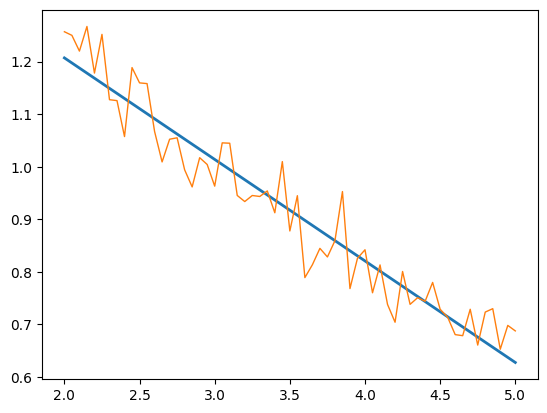

In [43]:
x, y = generation_variation('b1', 2, 'mn2', 500)
fp = np.polyfit(x, y, 1, full=True)[0]
print(fp)
f = np.poly1d(fp)
plt.plot(x, f(x), linewidth=2)
plt.plot(x, y, linewidth=1)

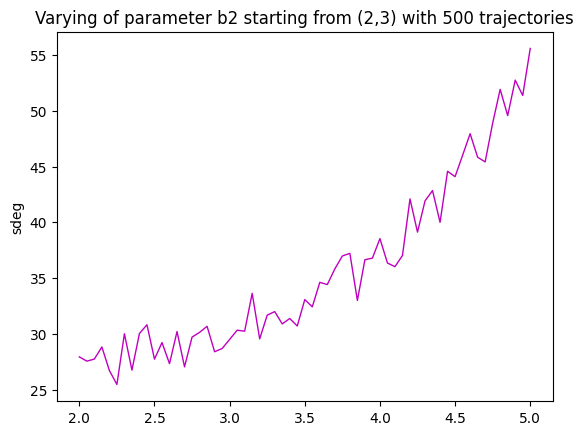

In [39]:
plot_dependency('b2', 2, 'sdeg', 'm', N = 500)

<ipython-input-36-20eb835aab37>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(param_code + ' (' + str(fst_spc) + ',' + str(5-fst_spc) + '); ' + char_type)


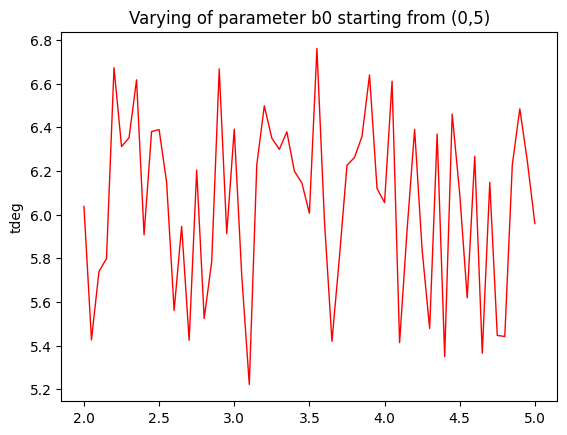

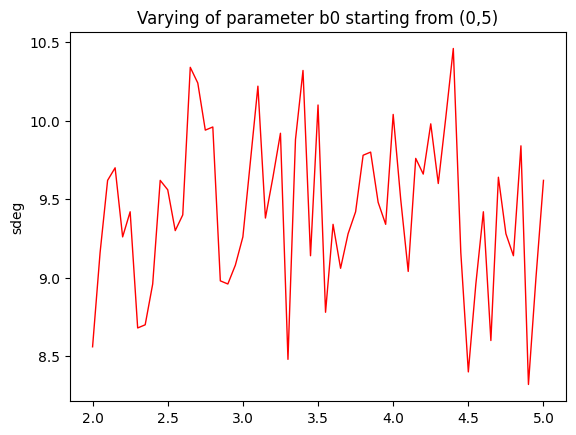

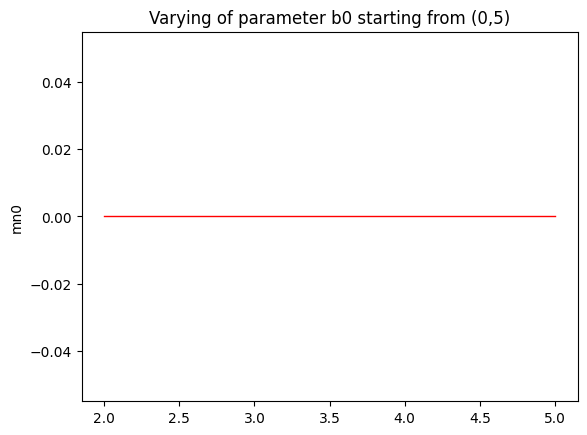

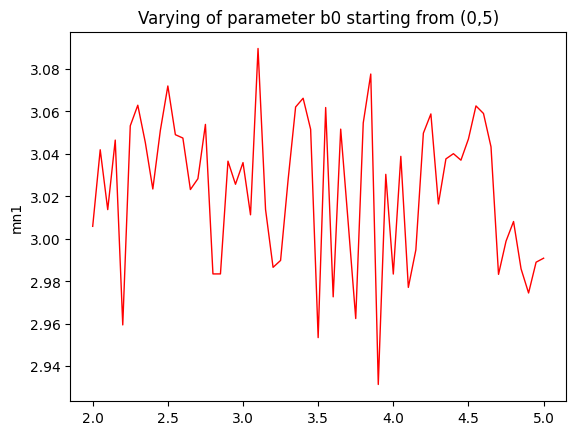

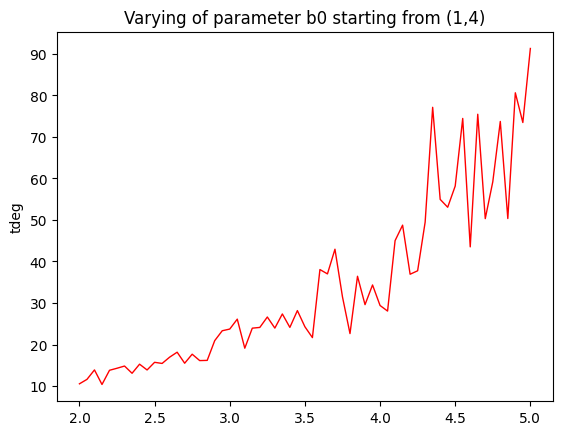

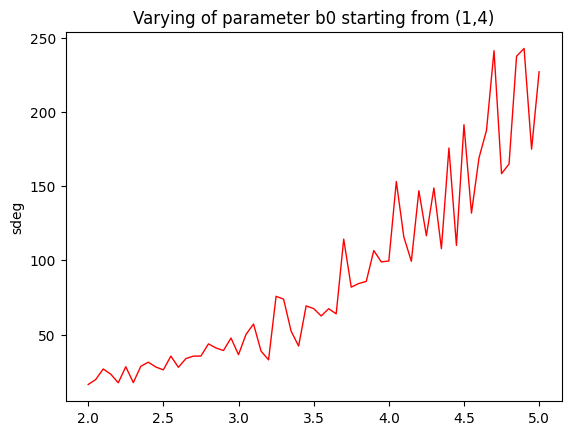

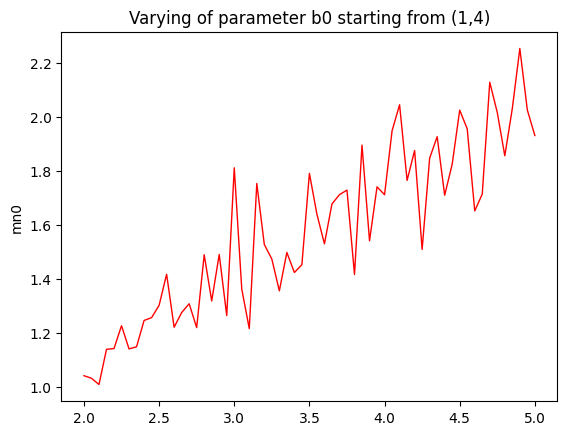

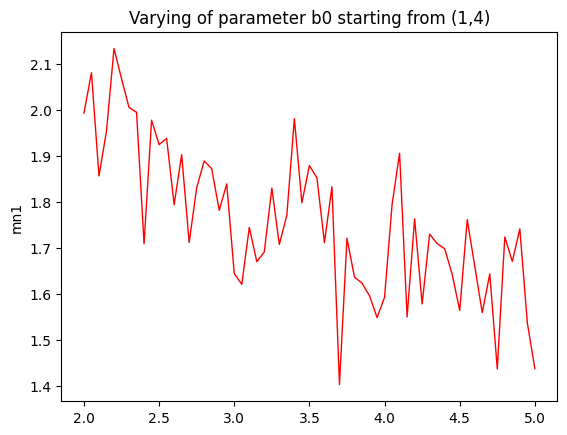

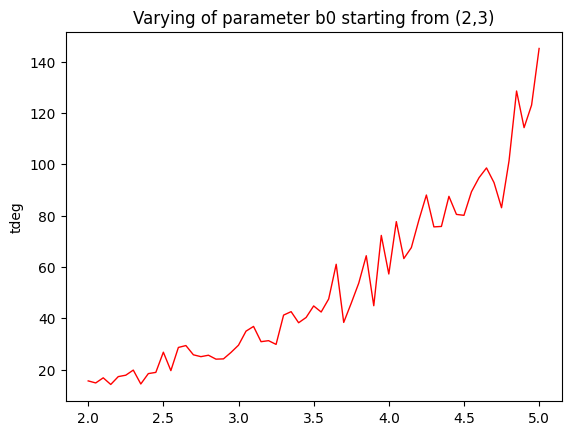

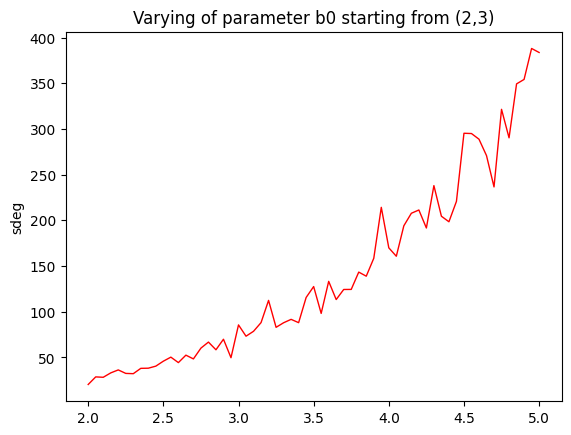

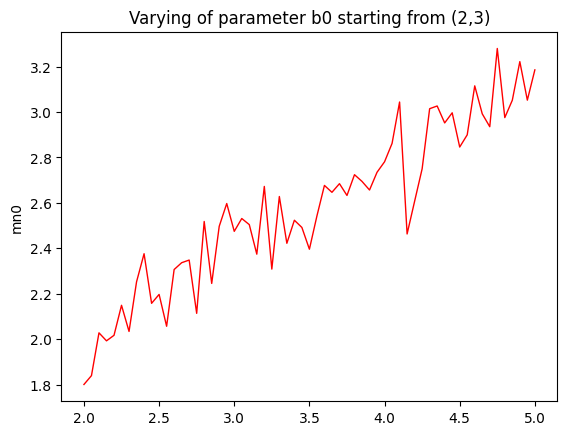

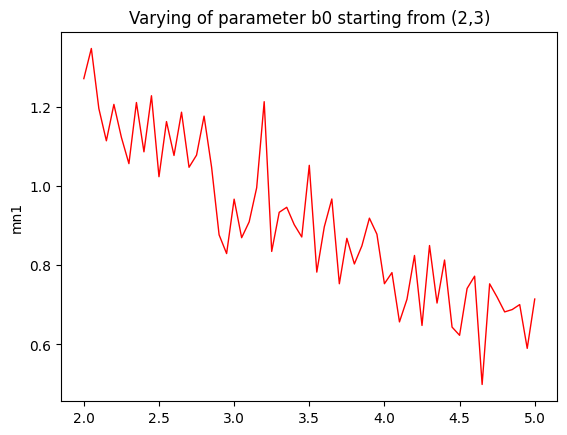

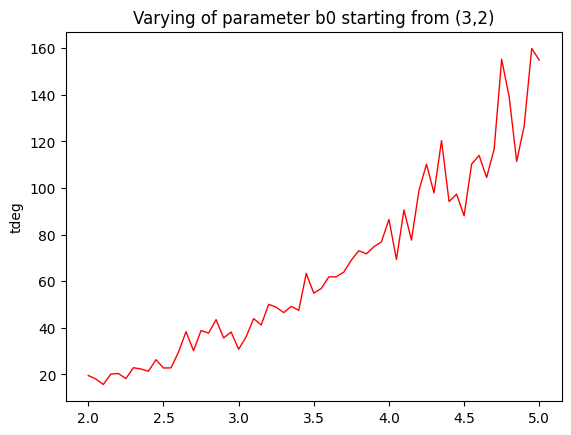

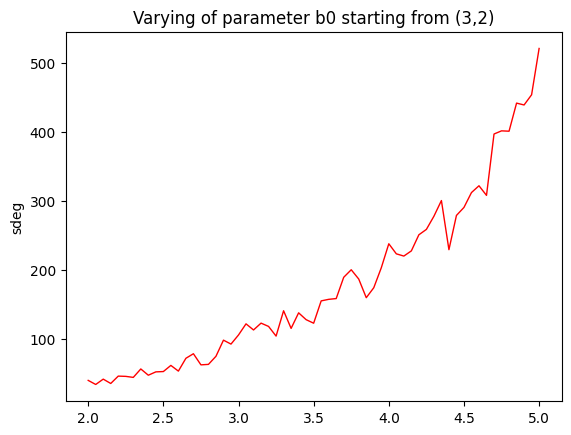

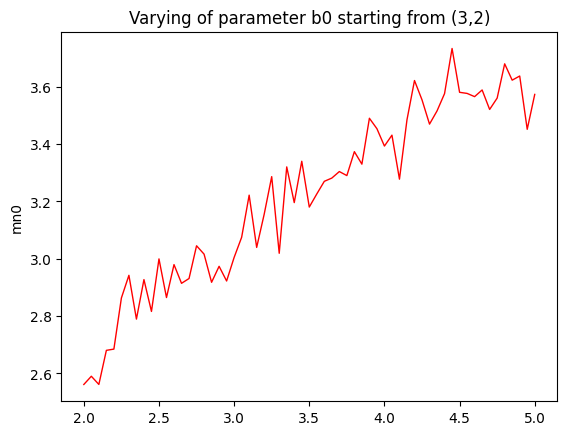

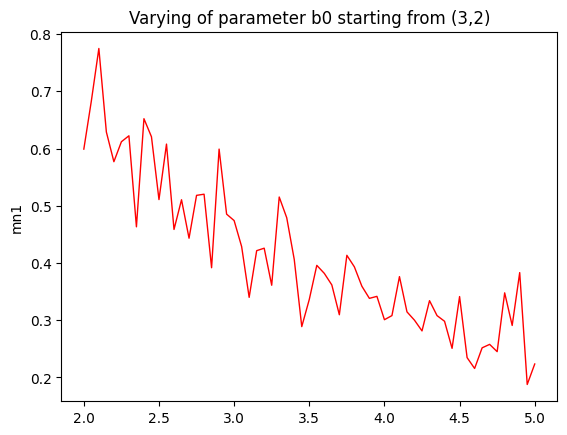

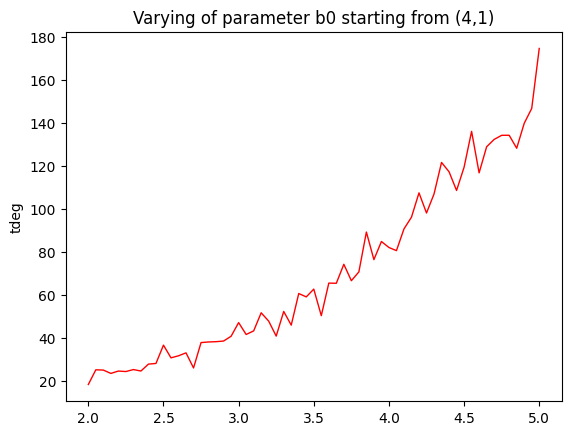

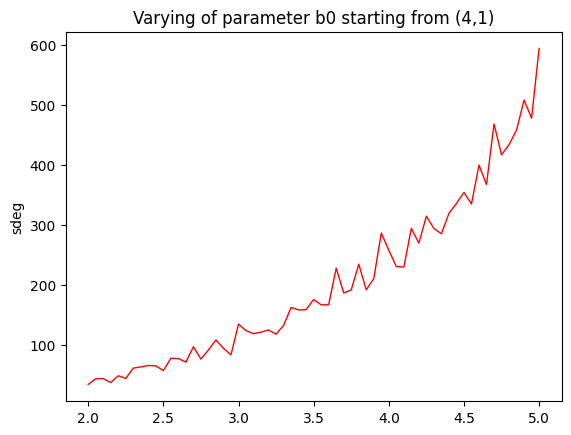

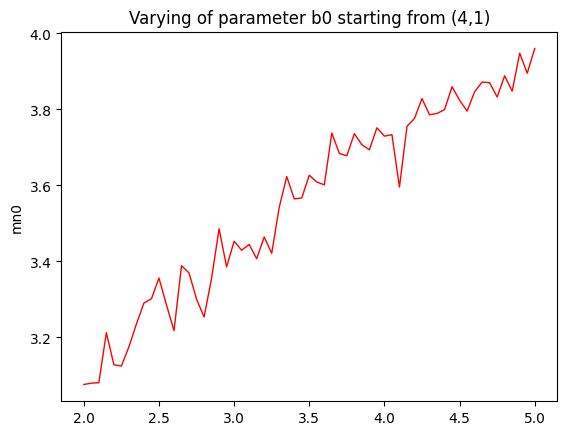

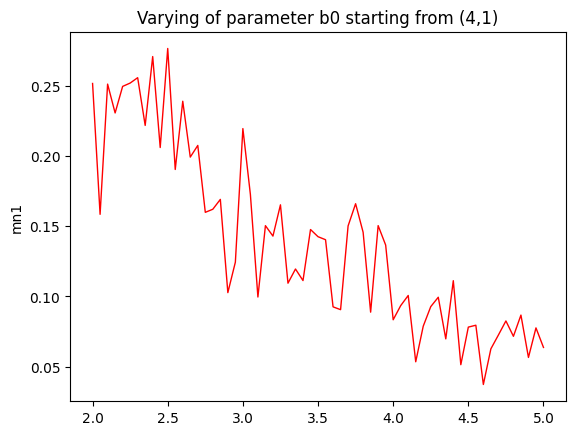

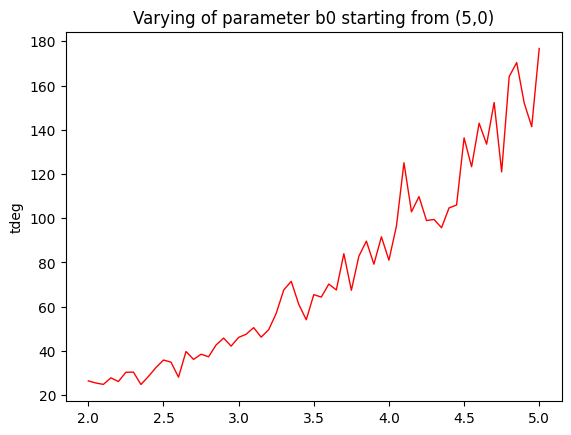

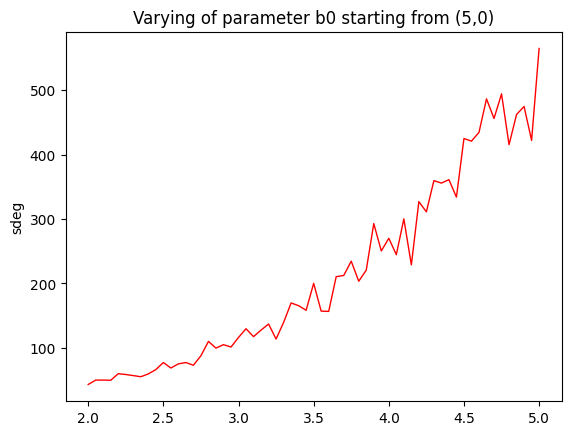

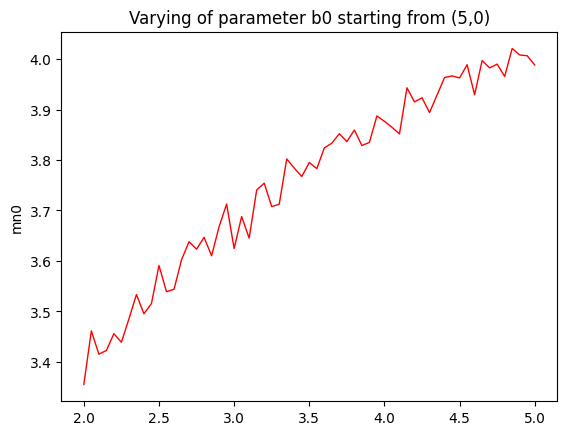

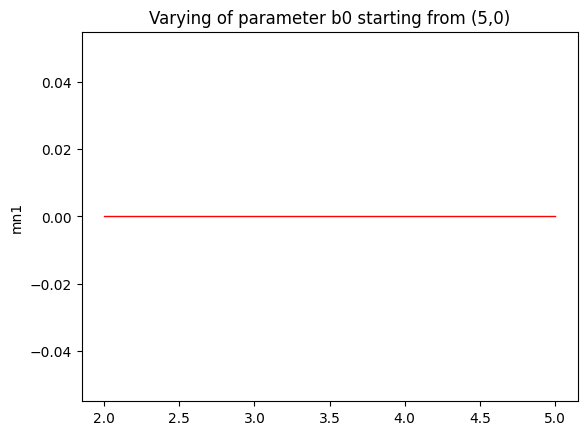

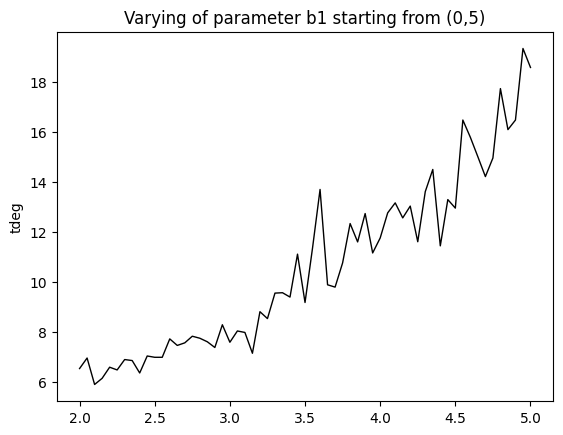

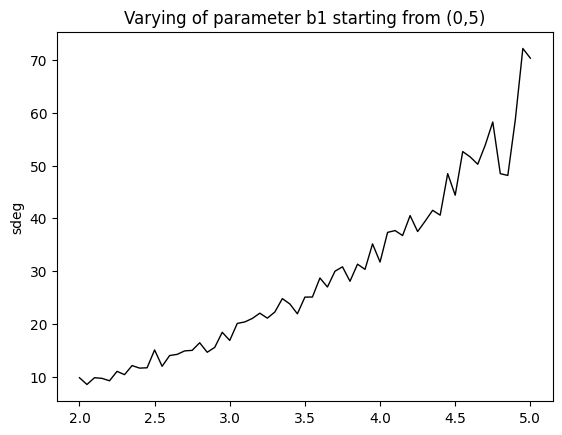

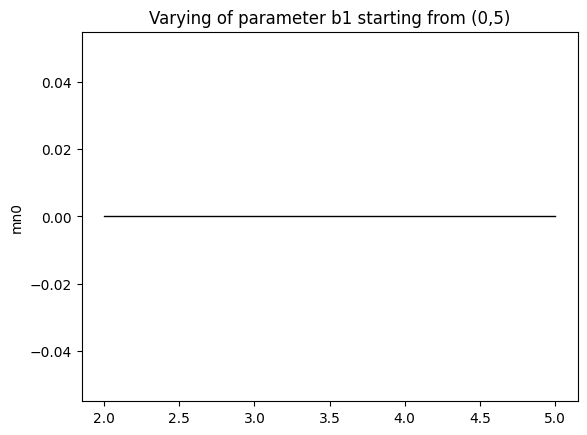

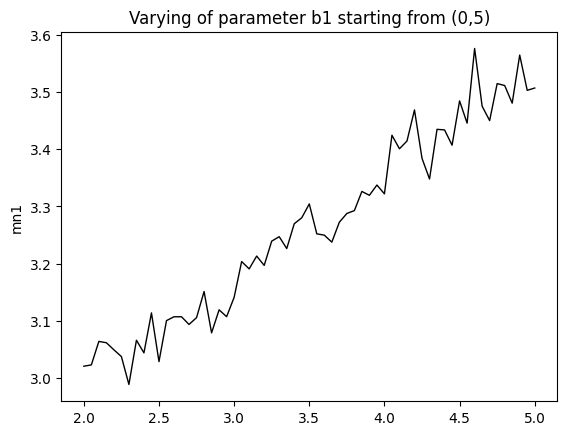

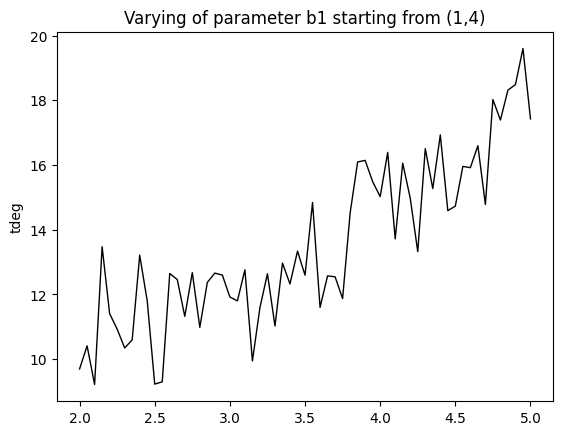

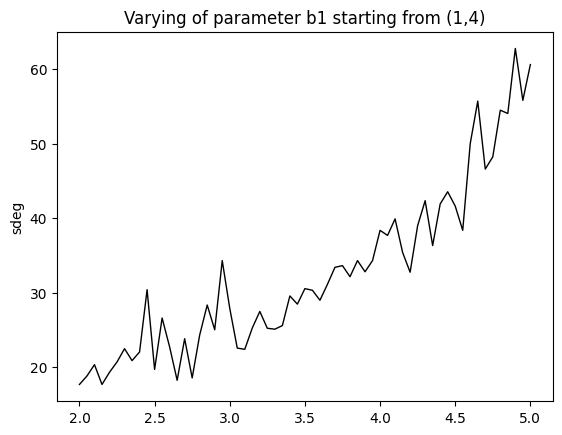

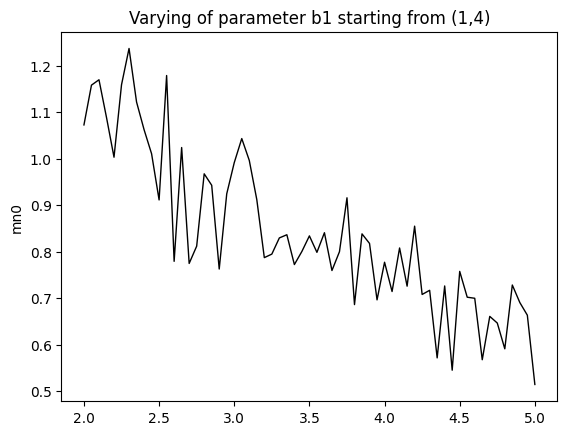

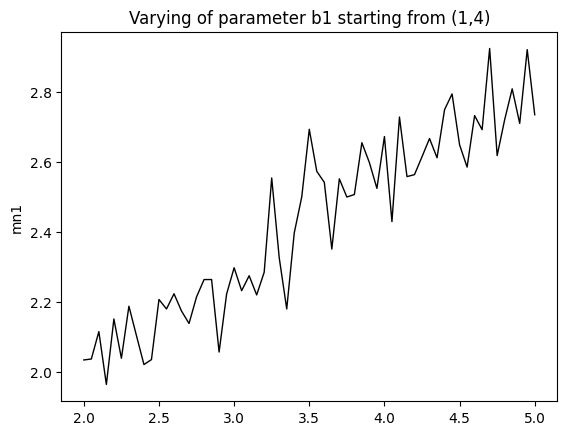

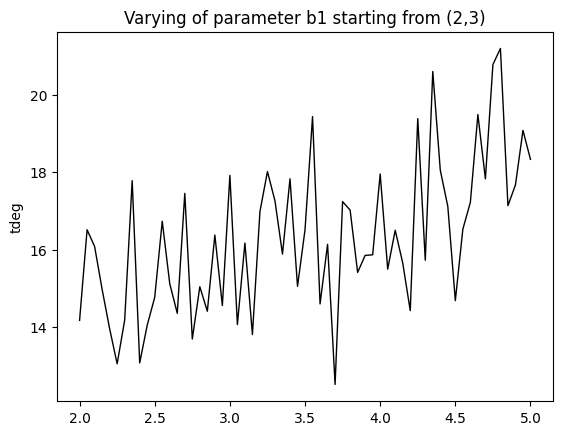

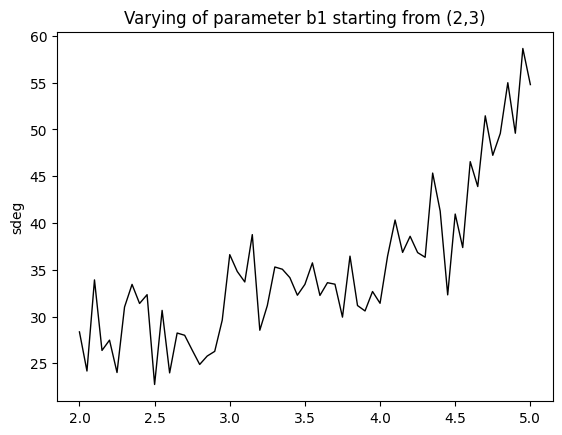

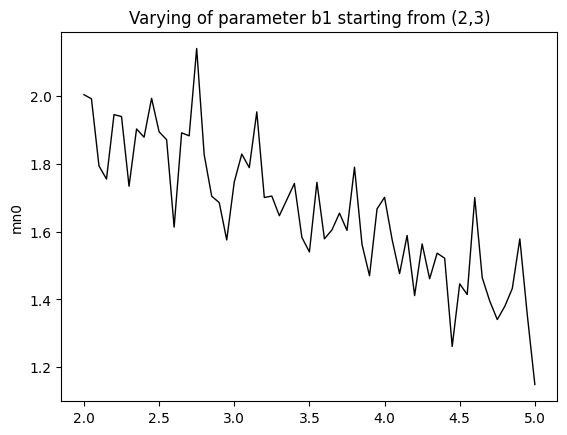

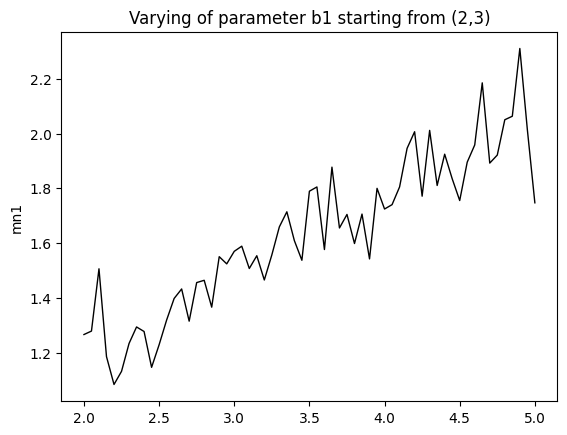

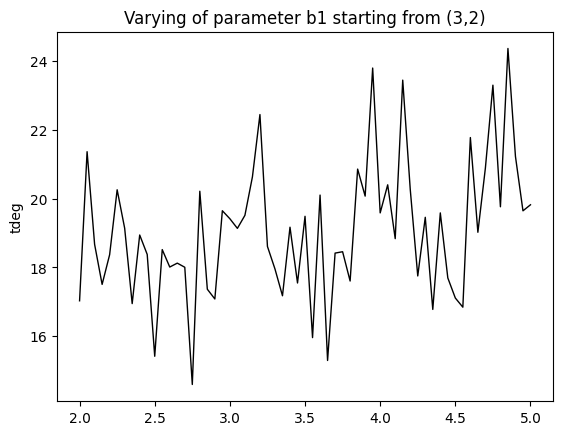

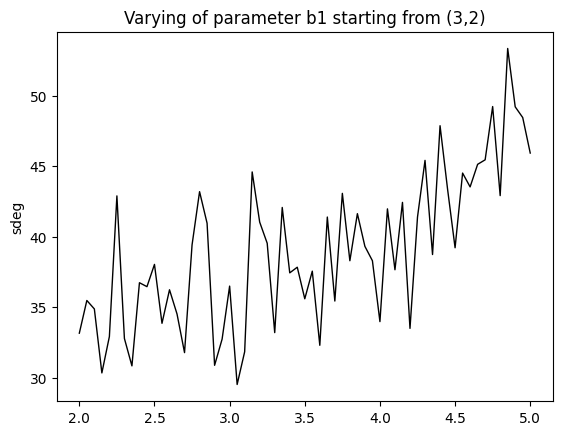

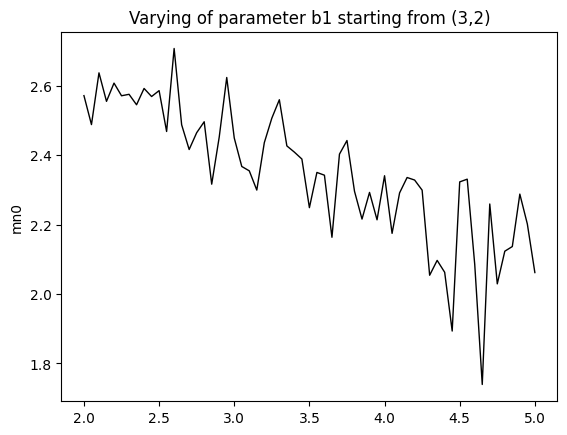

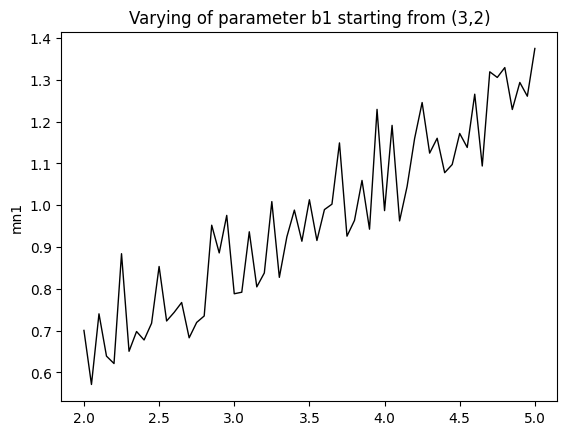

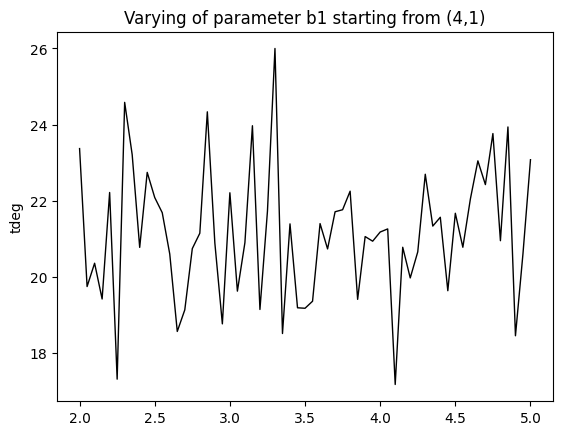

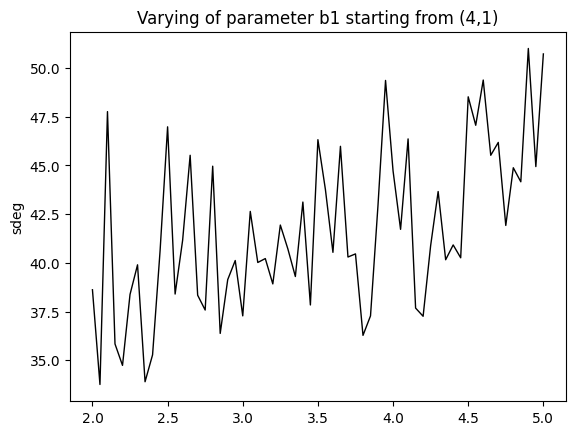

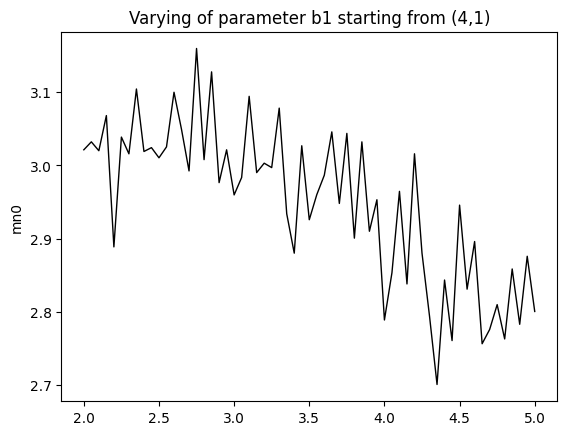

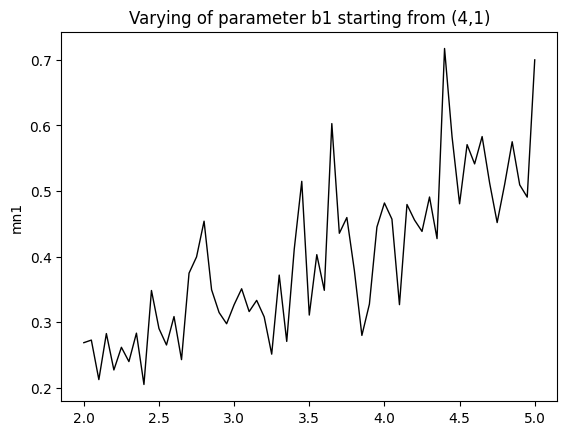

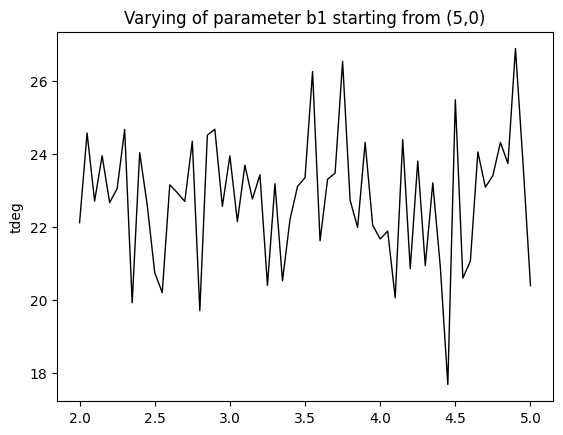

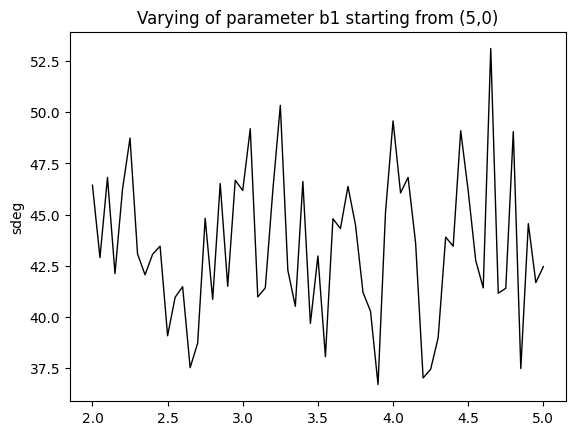

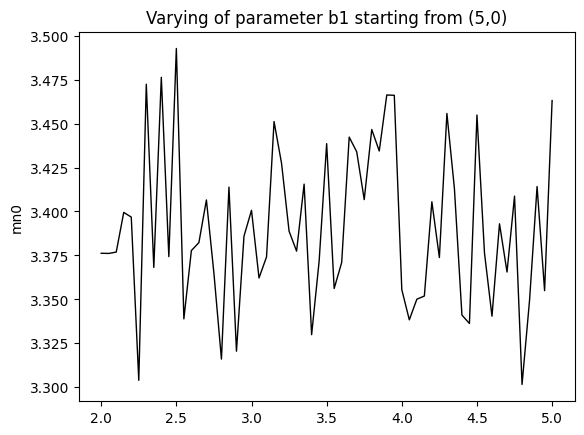

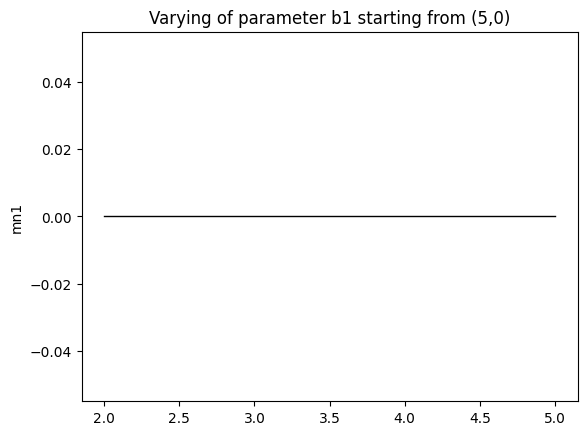

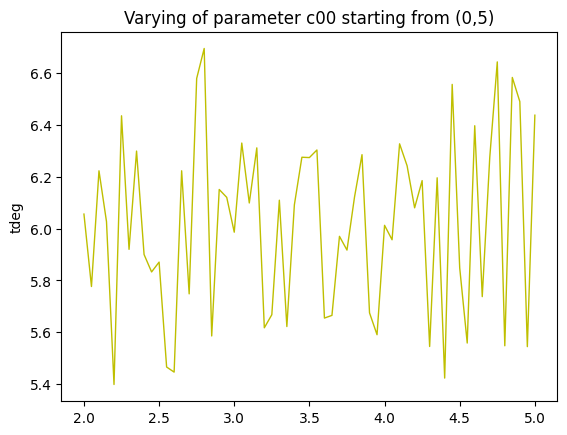

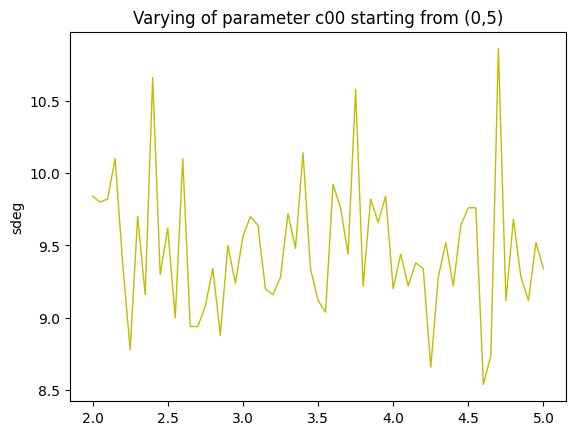

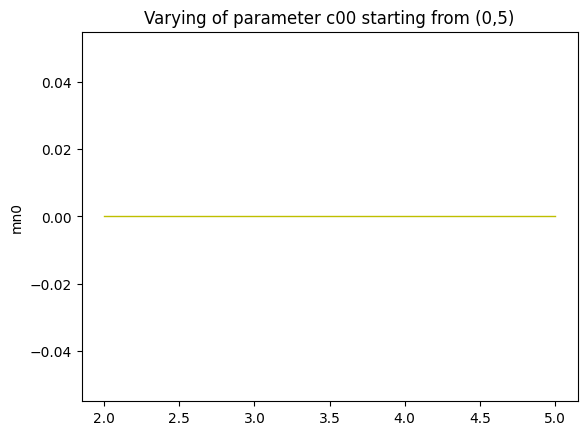

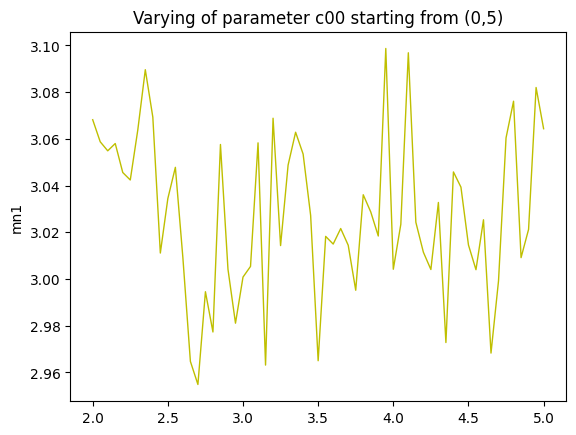

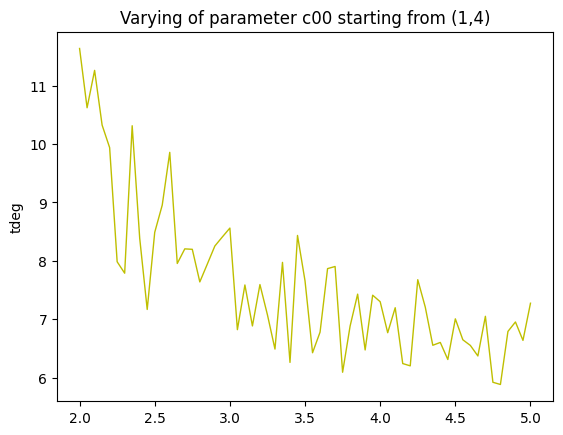

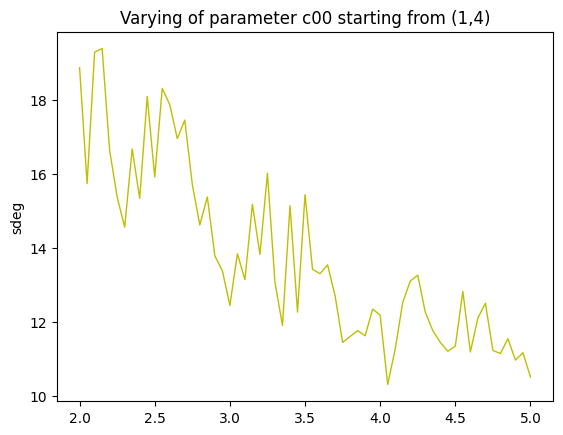

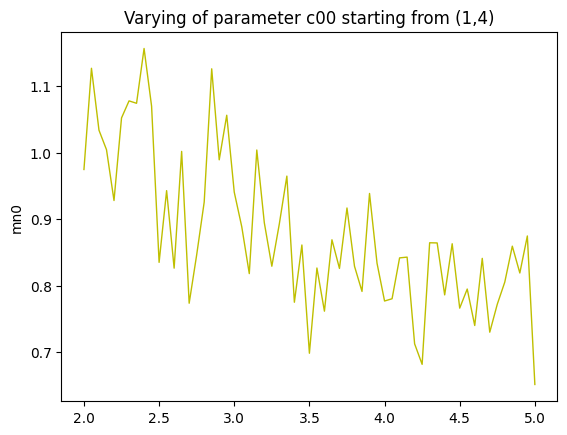

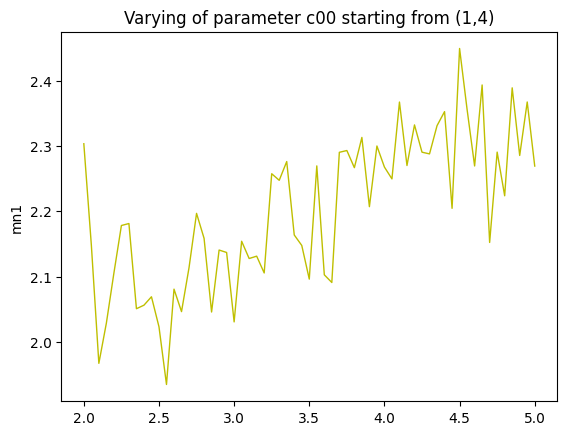

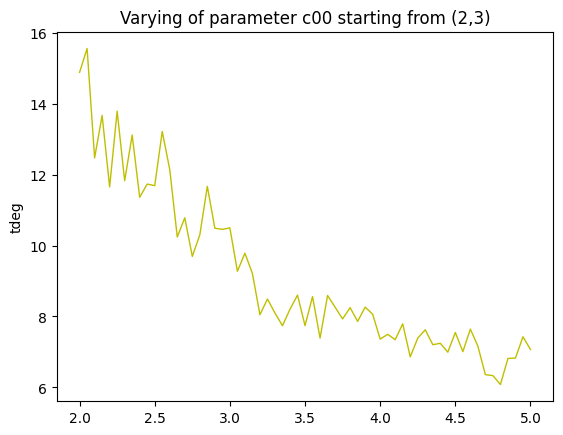

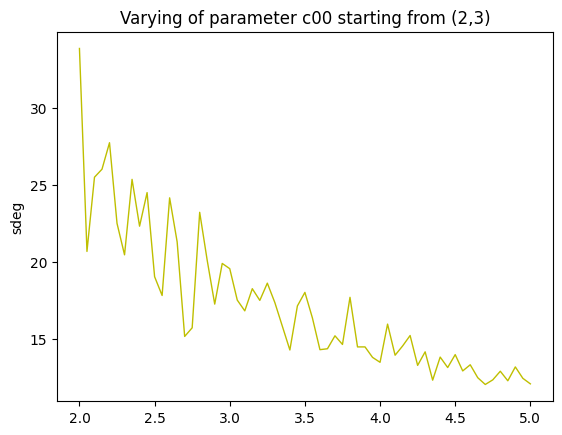

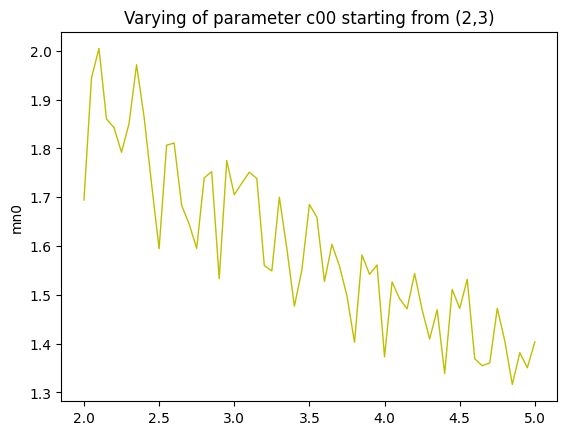

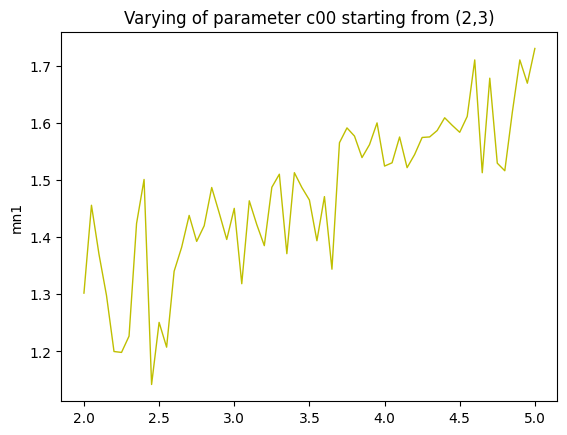

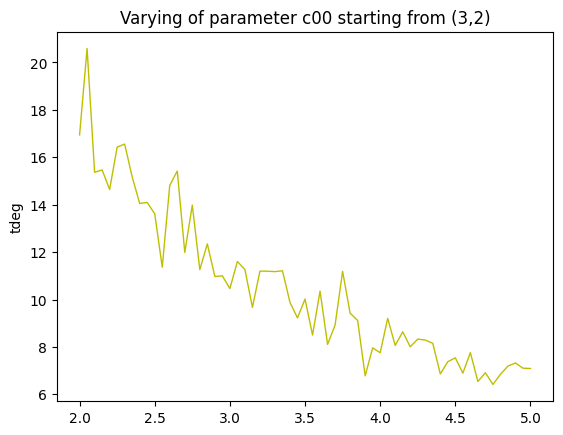

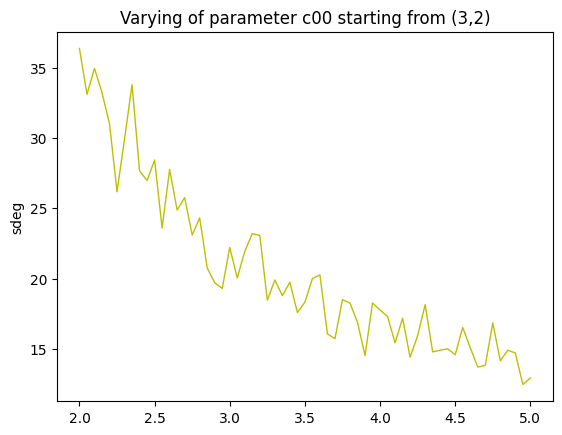

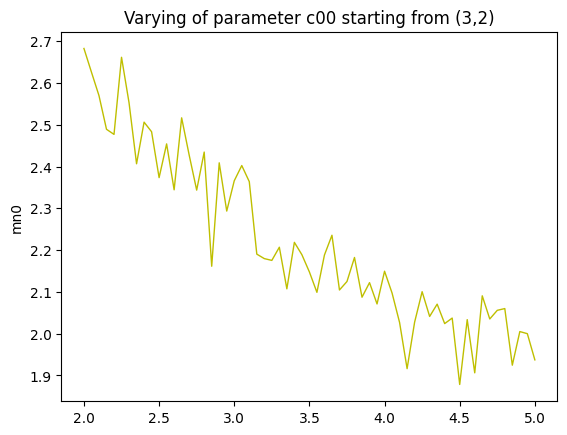

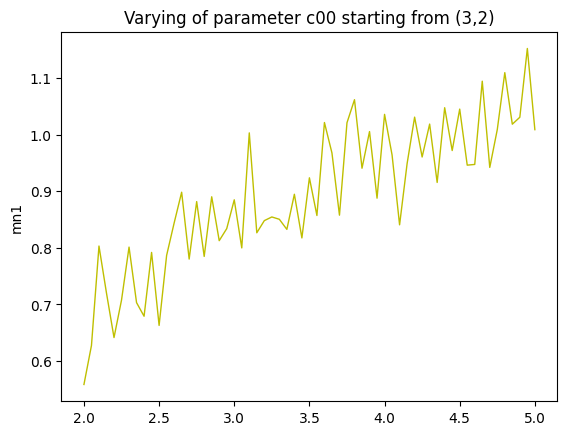

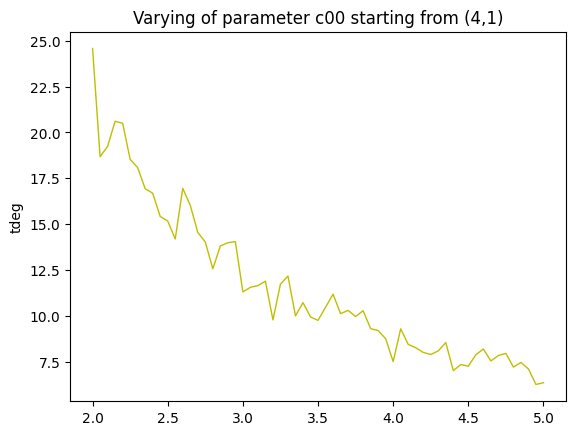

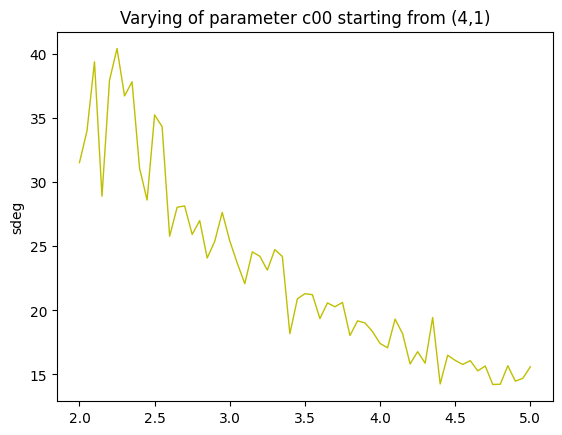

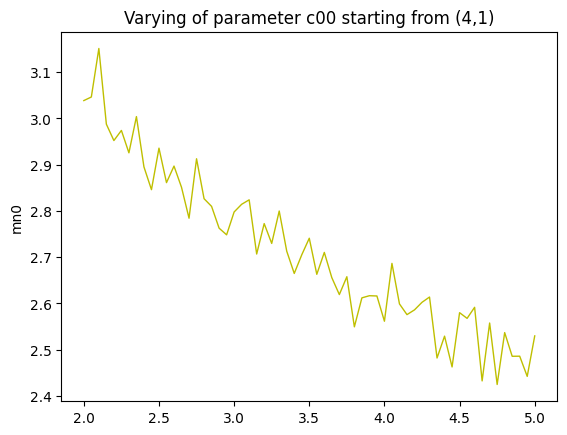

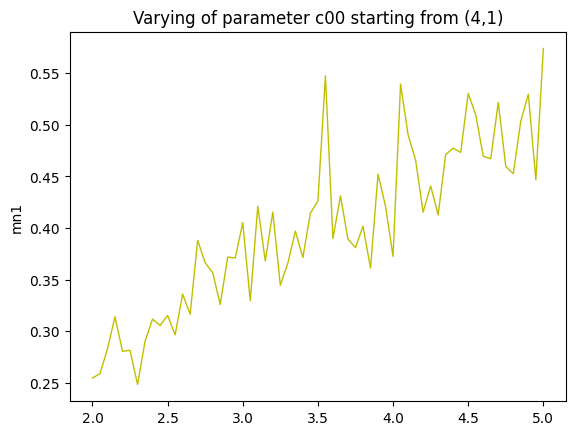

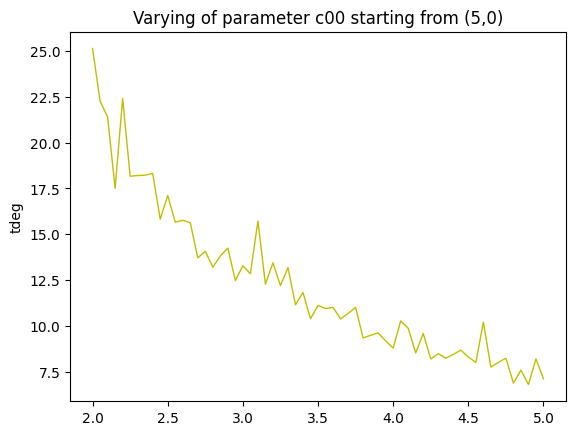

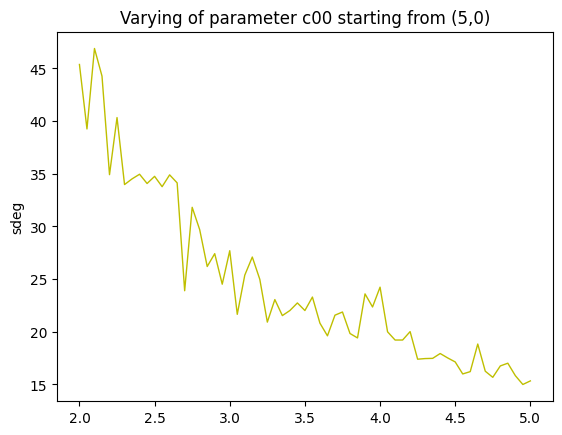

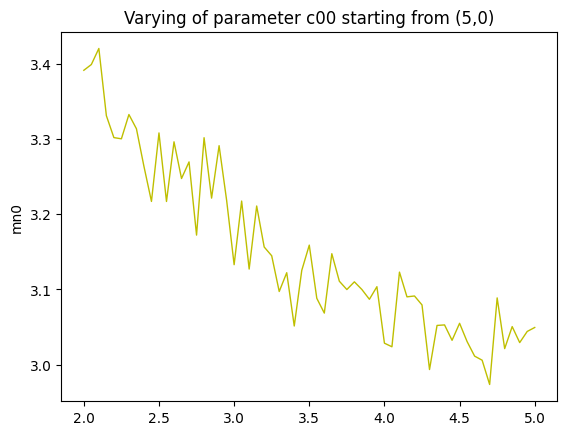

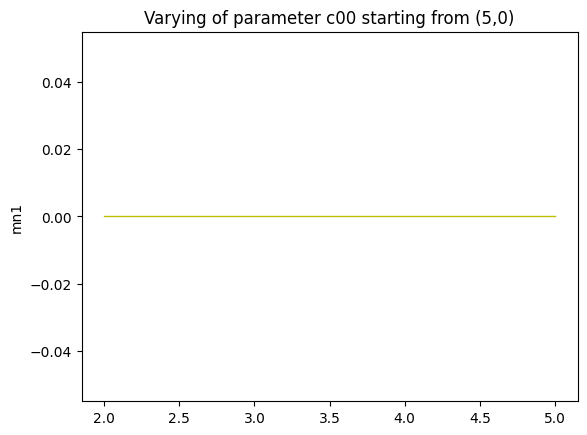

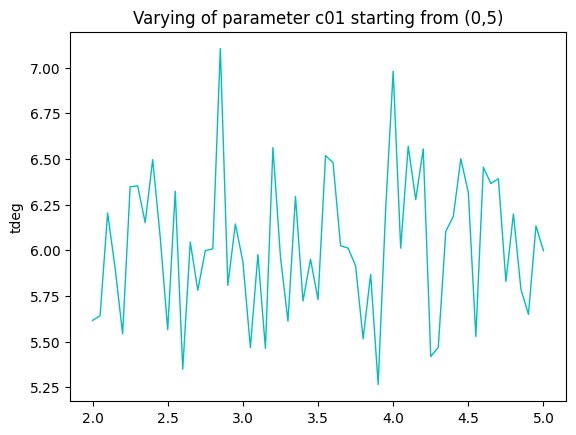

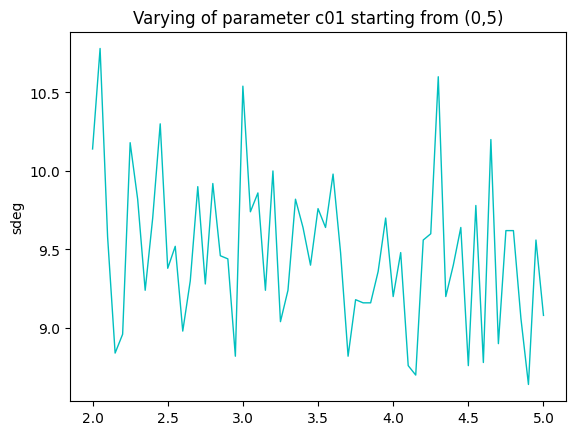

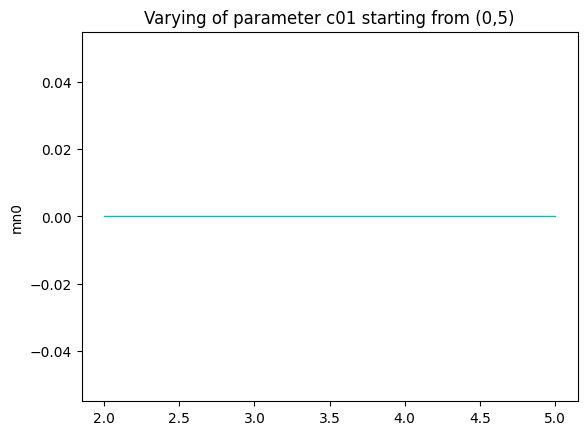

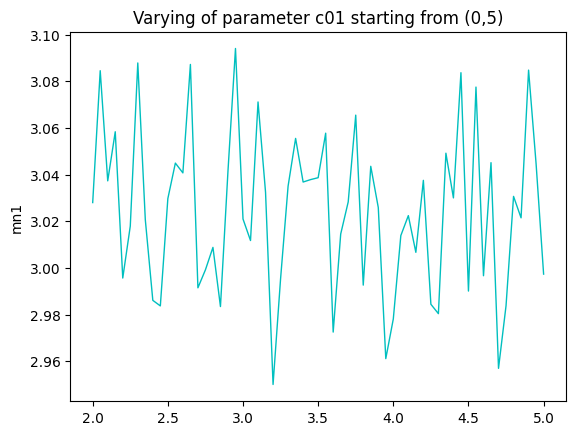

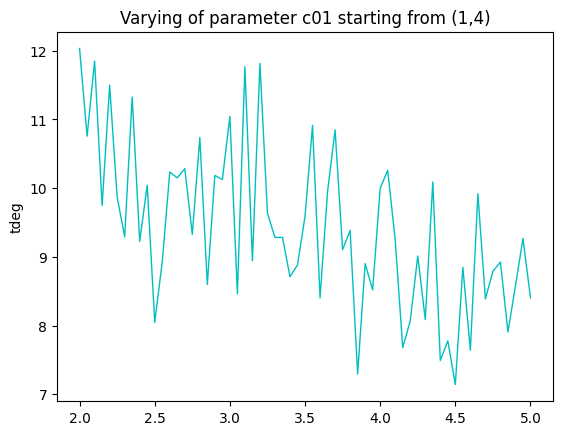

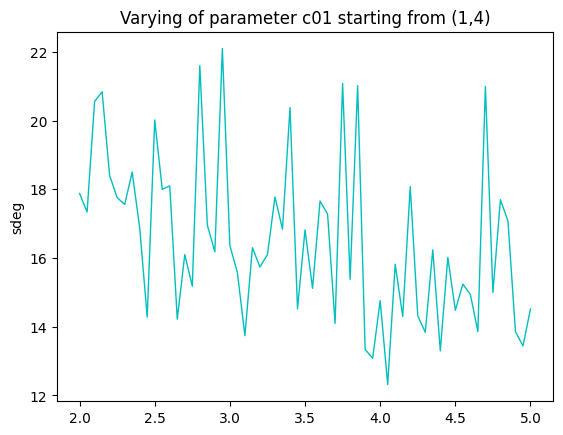

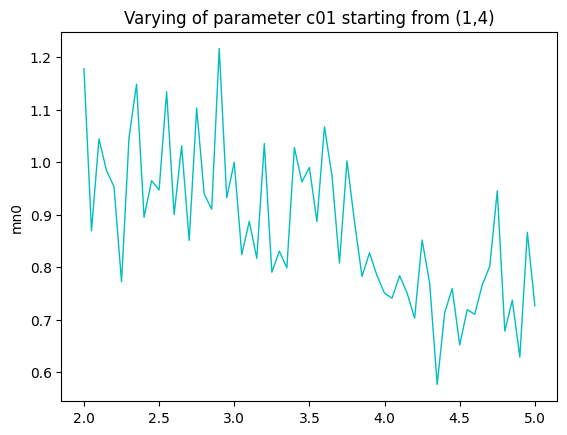

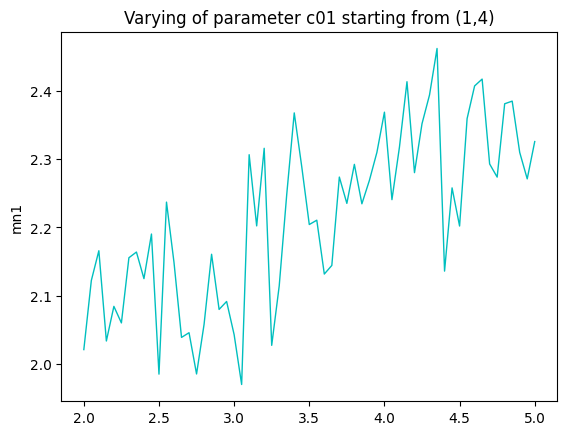

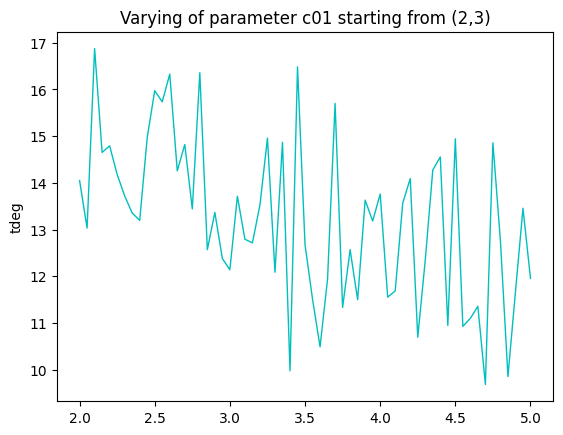

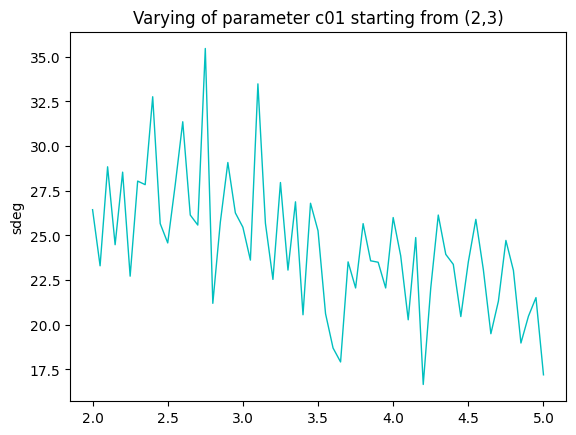

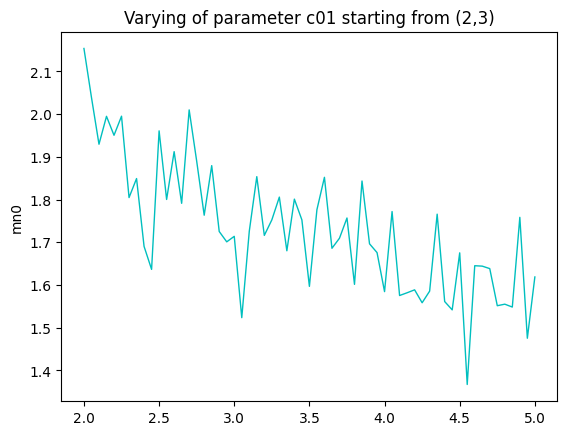

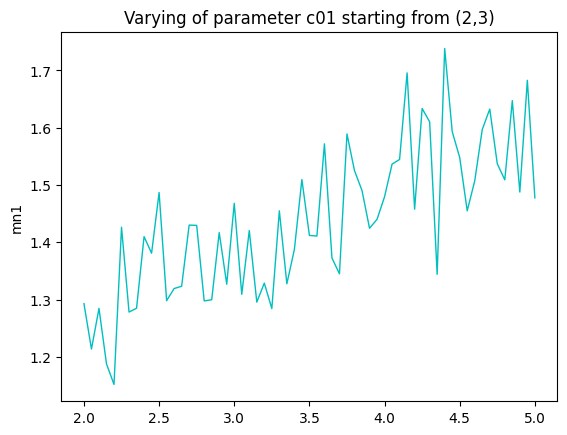

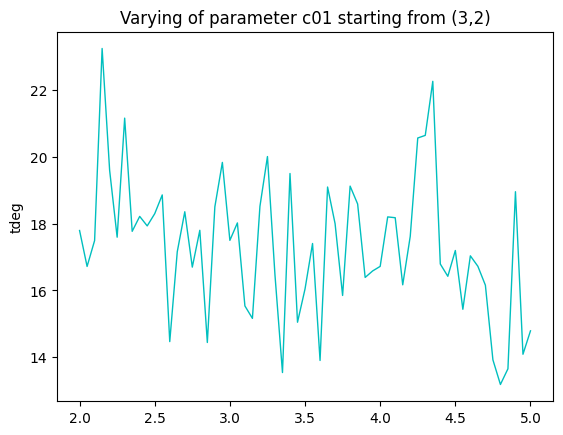

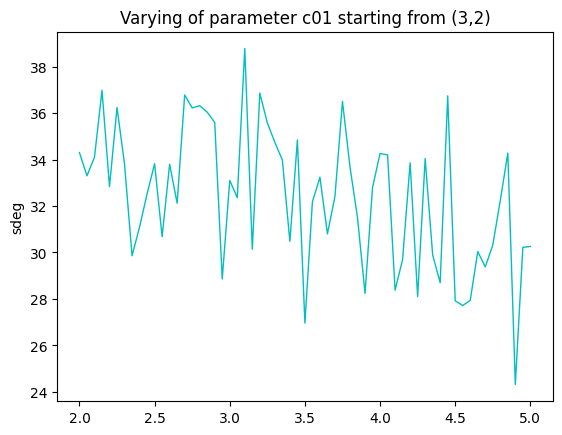

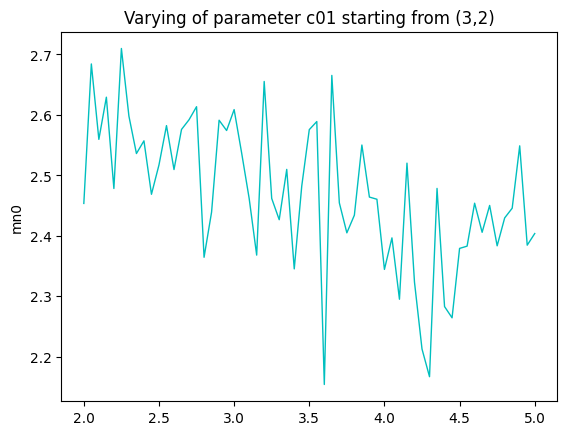

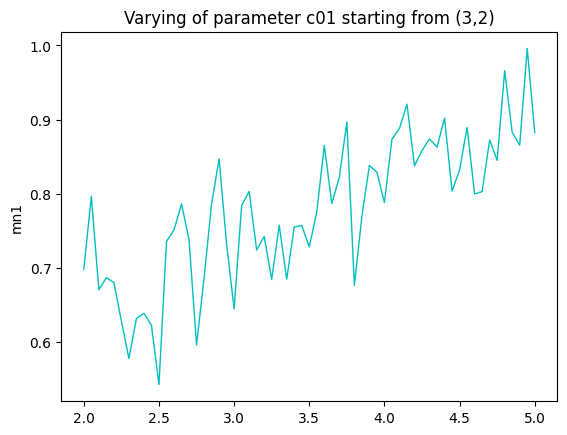

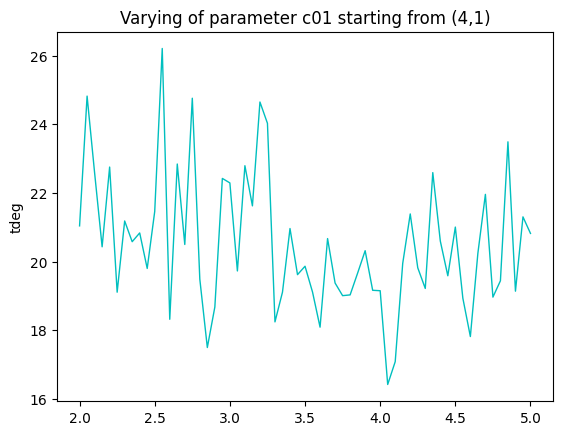

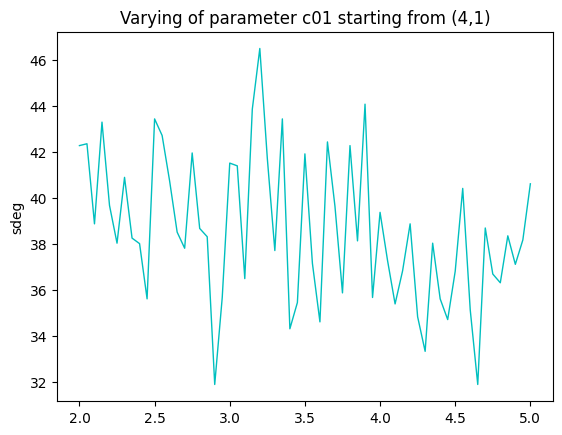

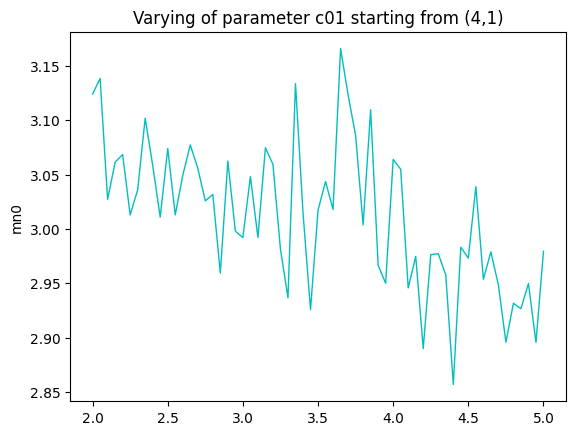

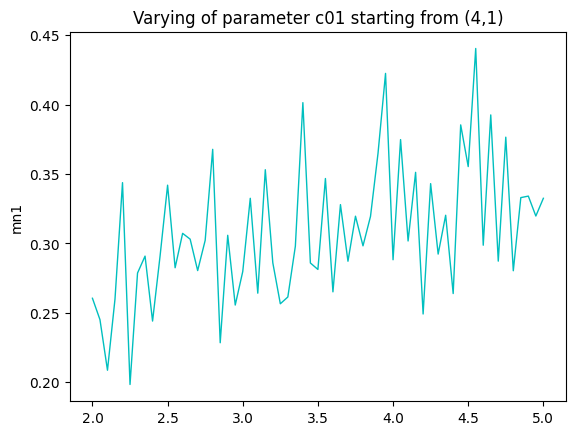

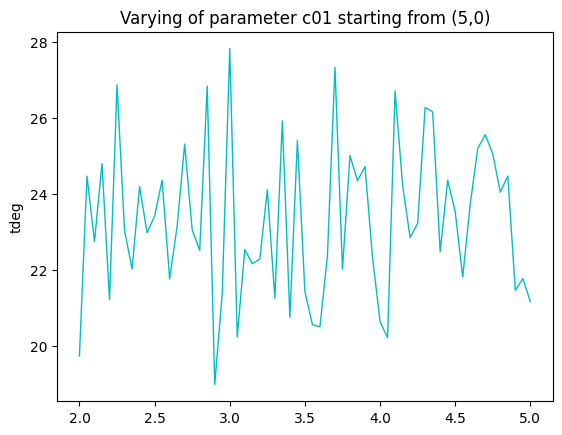

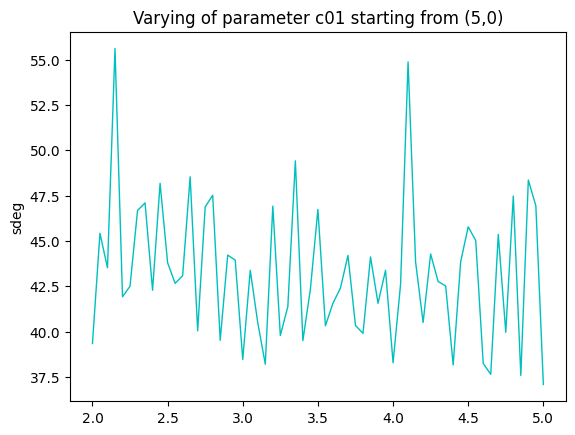

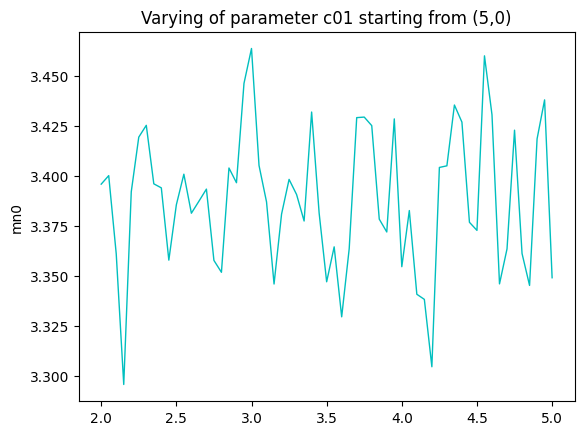

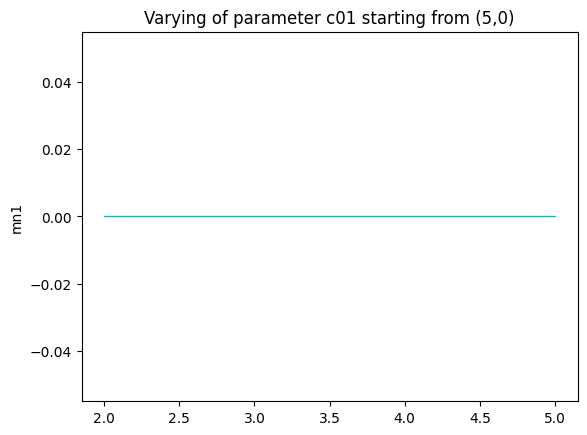

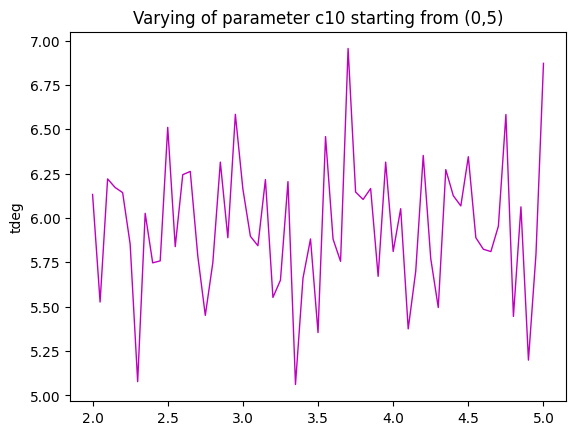

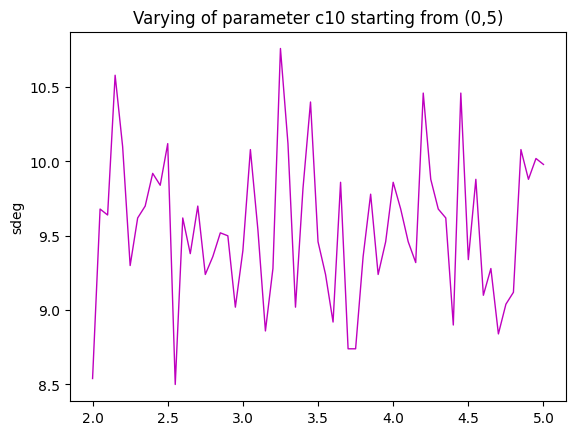

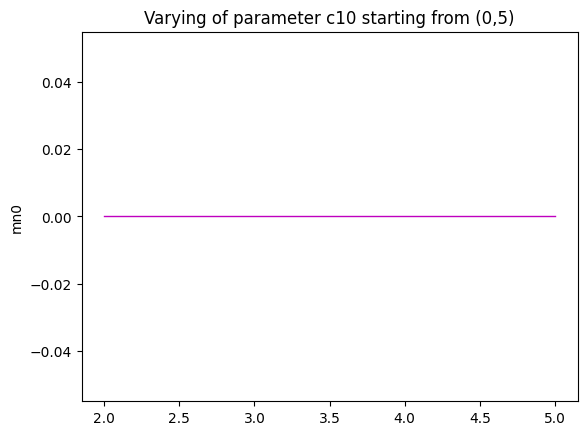

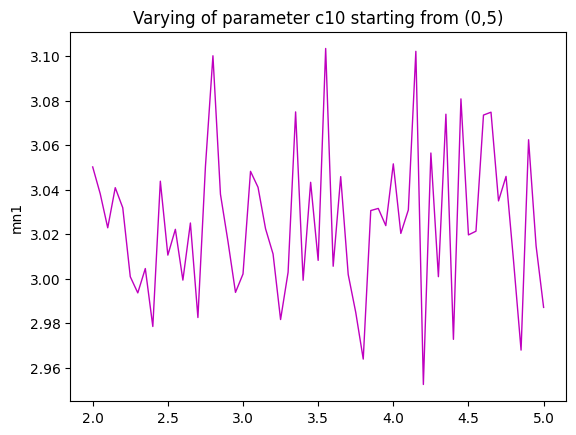

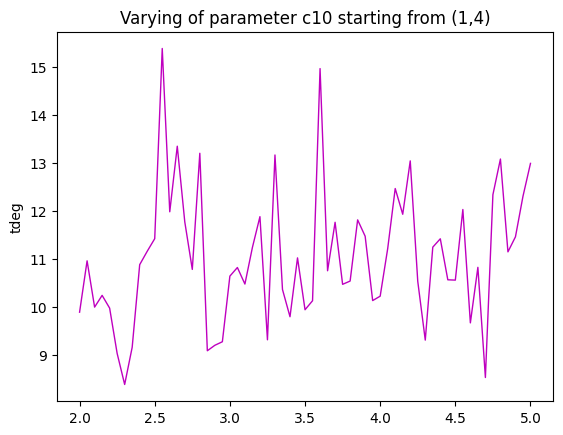

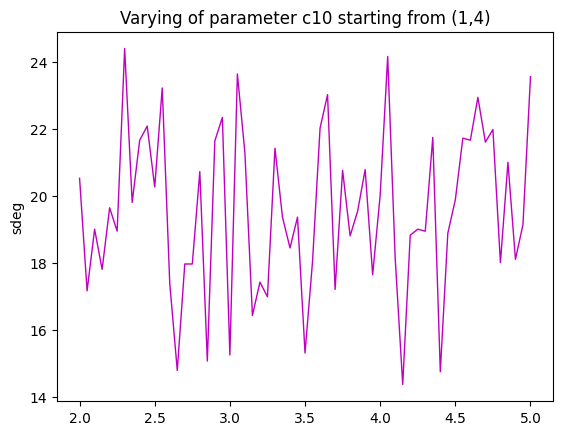

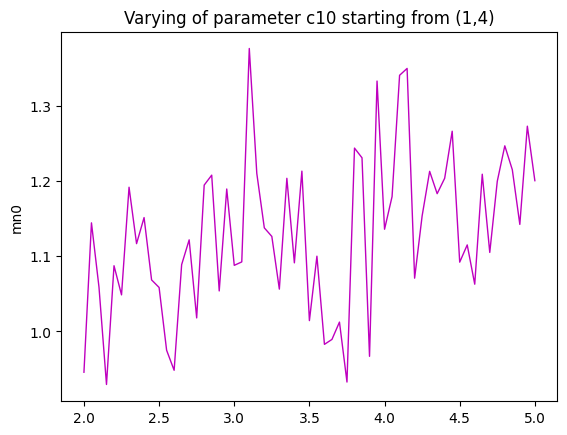

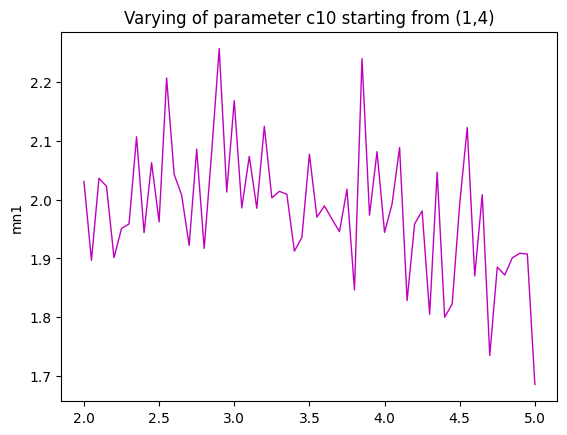

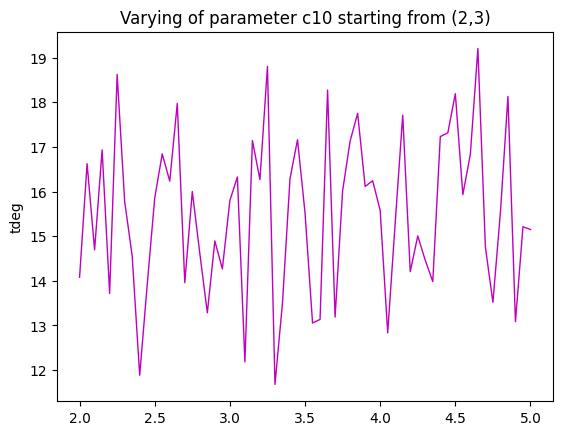

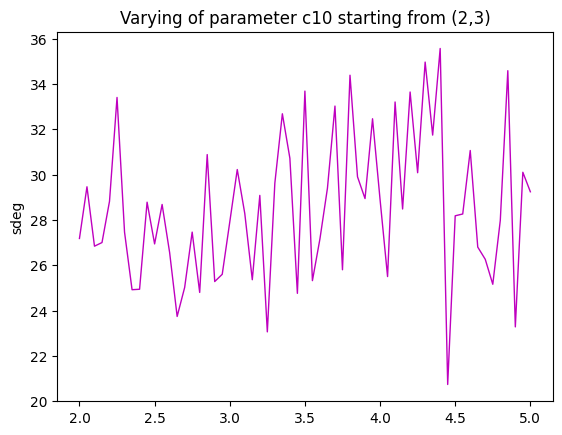

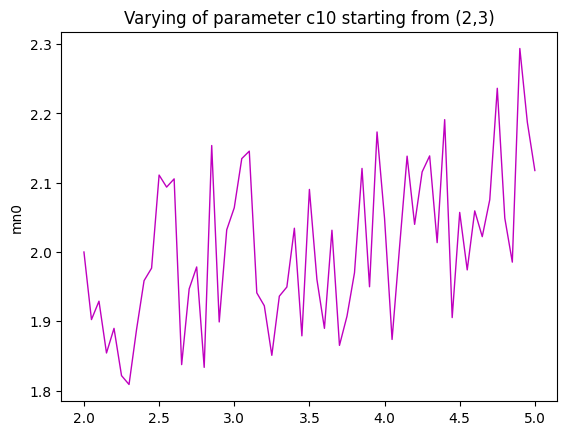

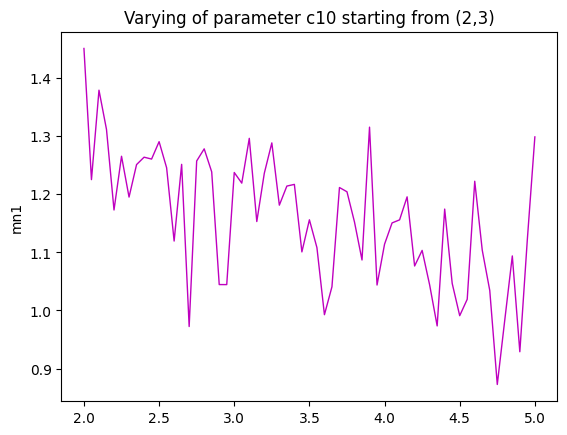

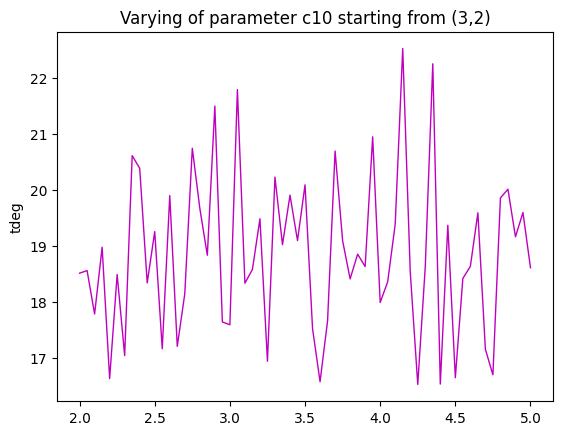

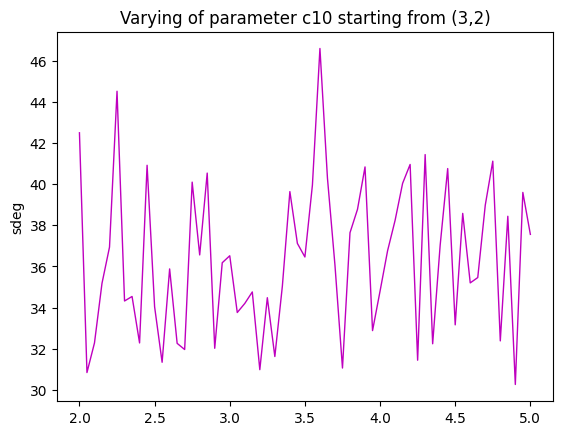

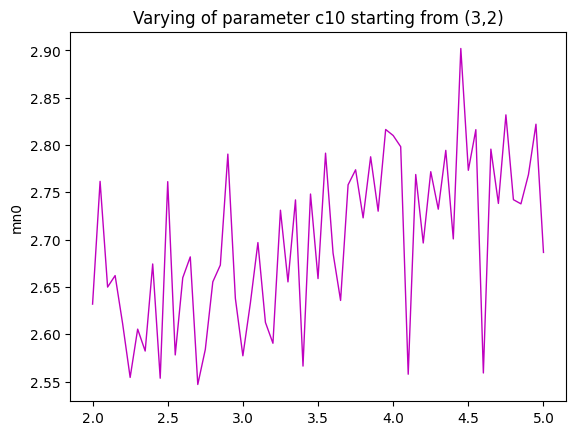

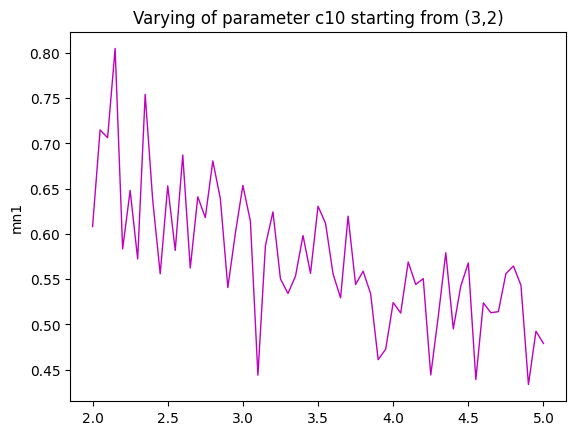

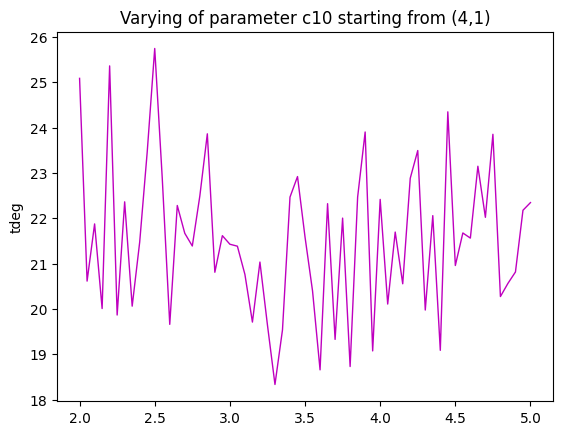

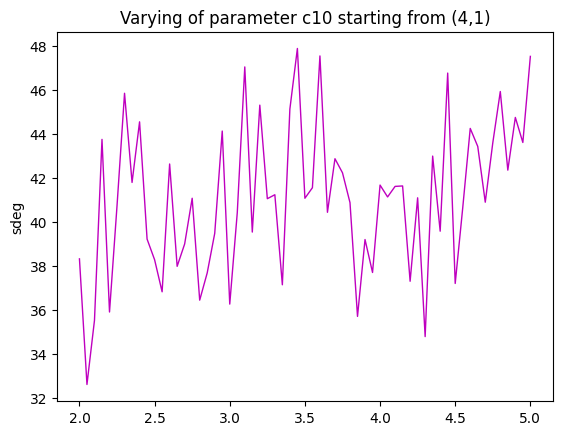

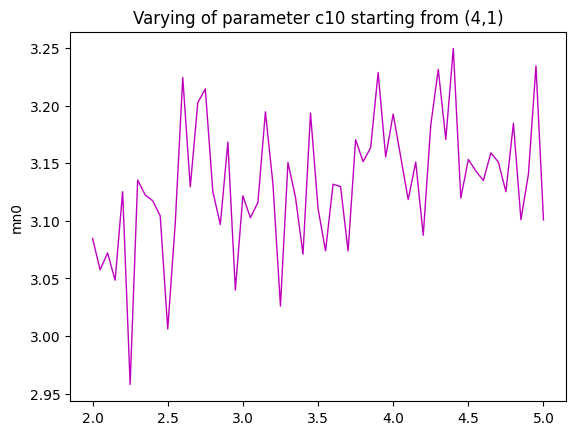

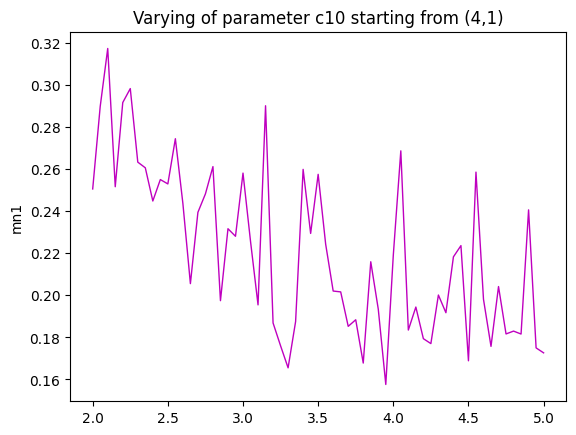

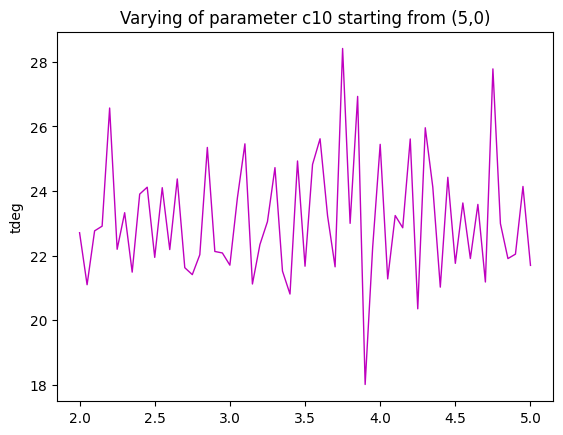

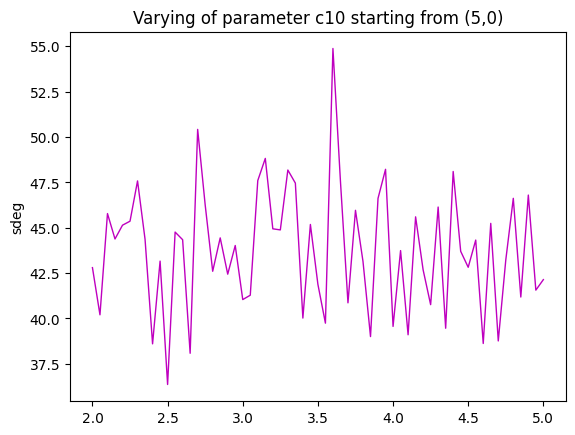

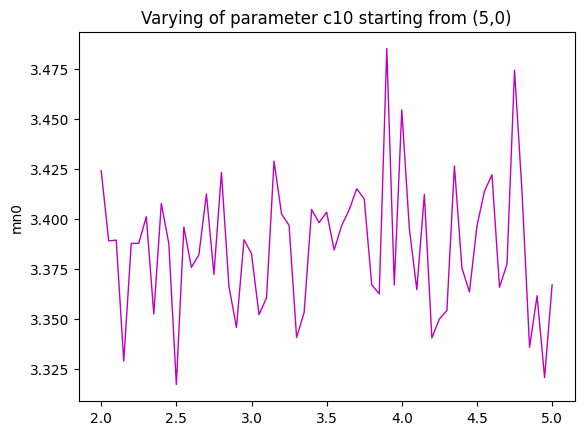

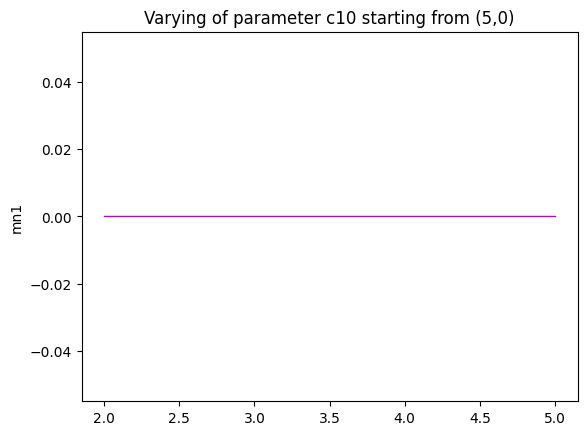

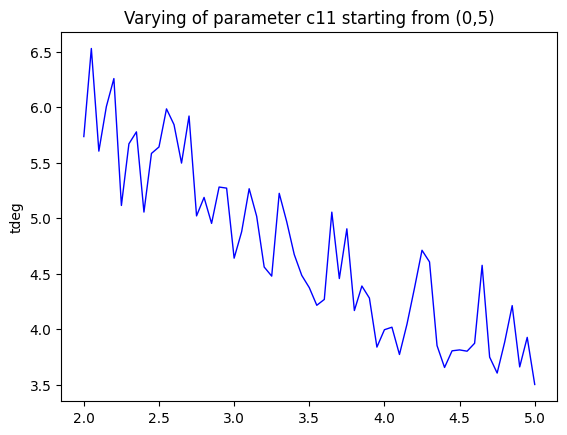

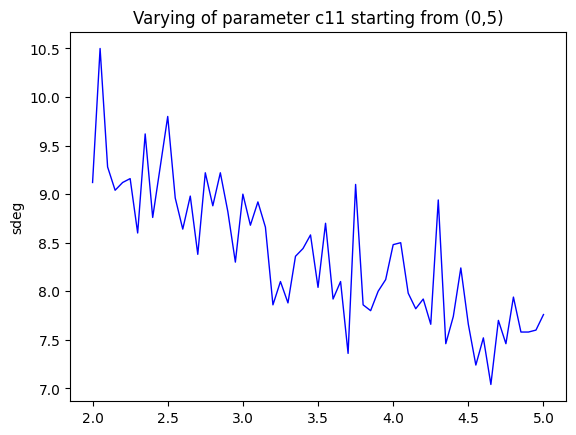

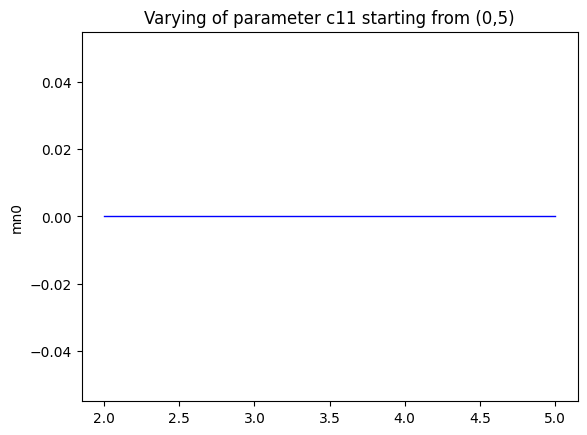

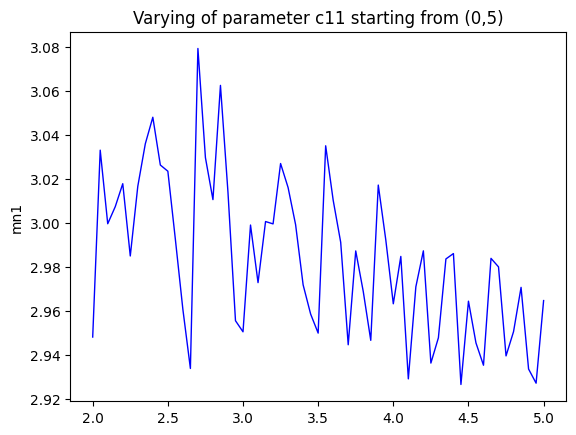

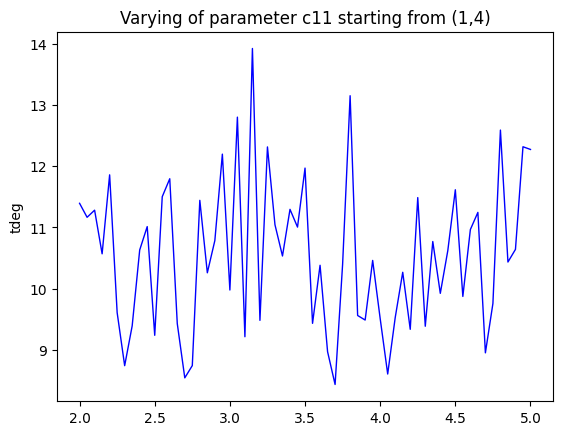

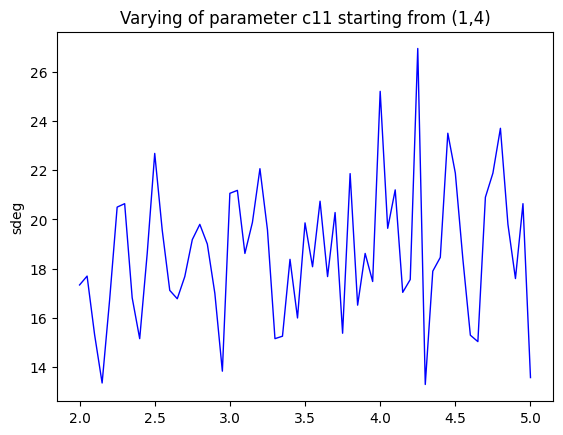

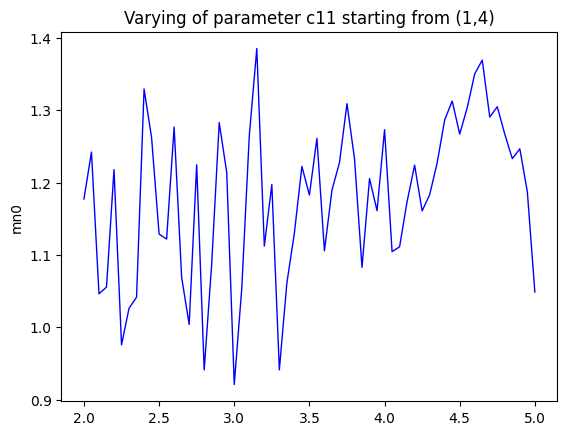

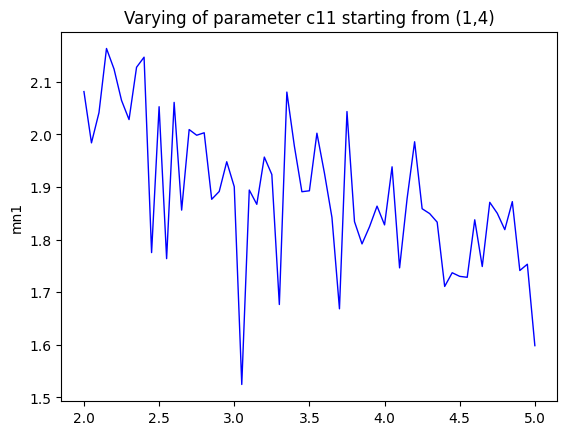

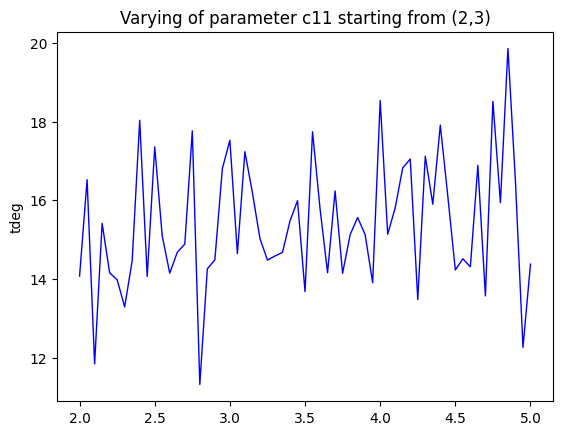

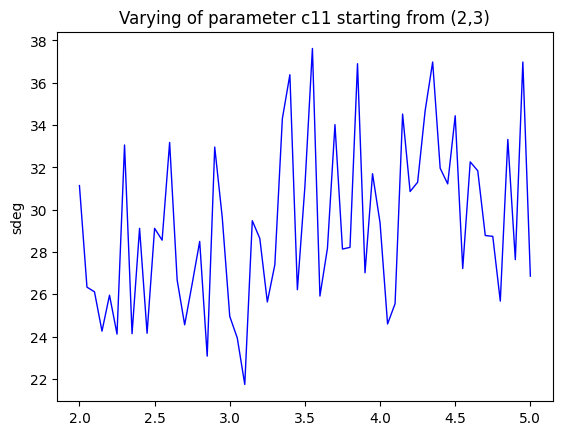

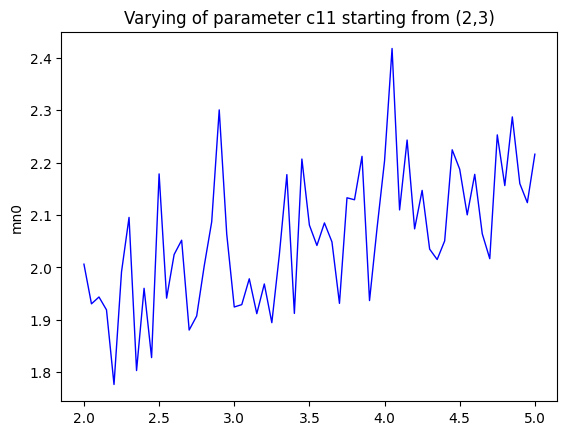

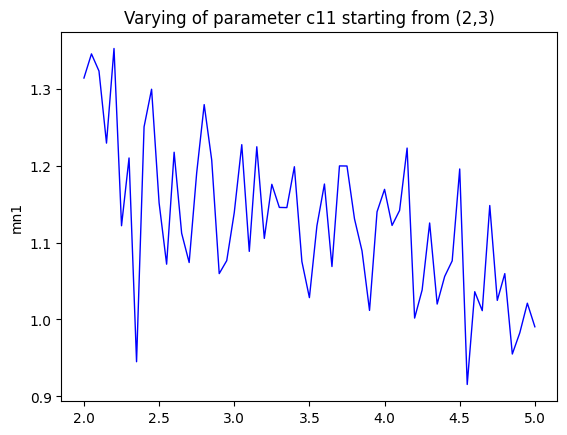

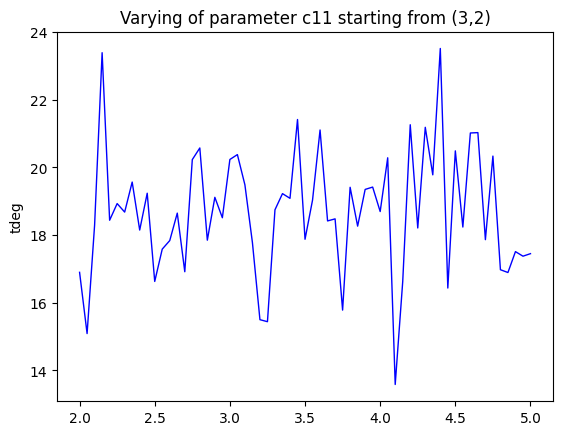

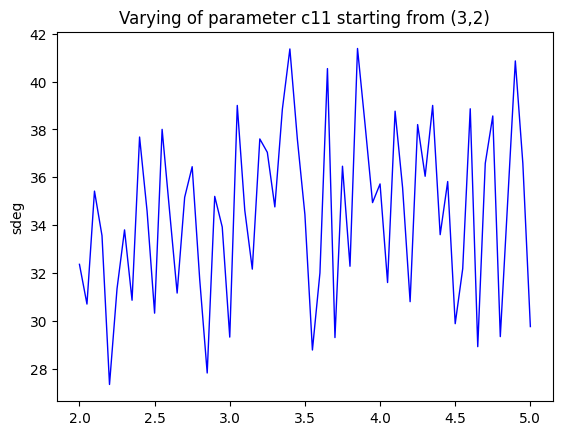

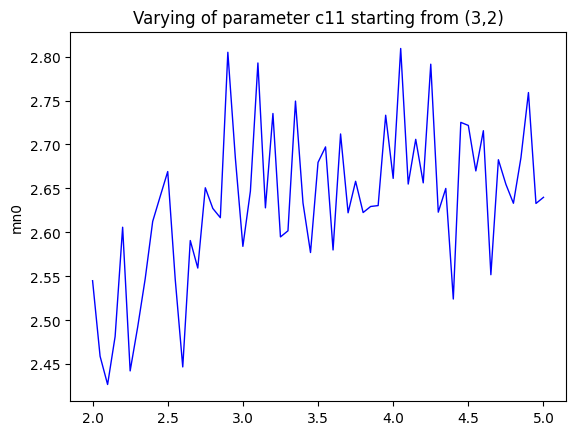

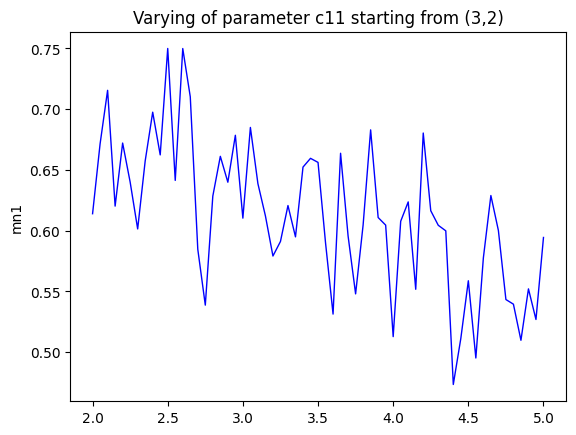

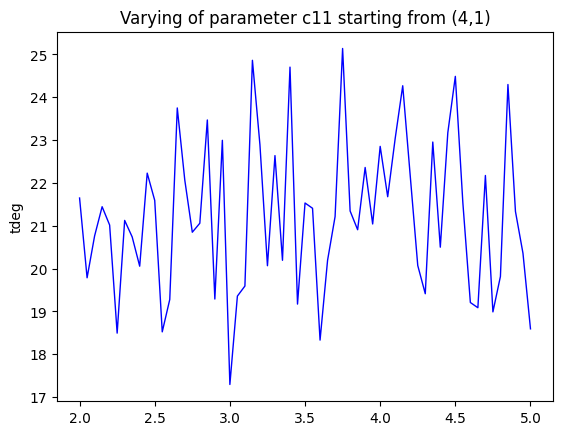

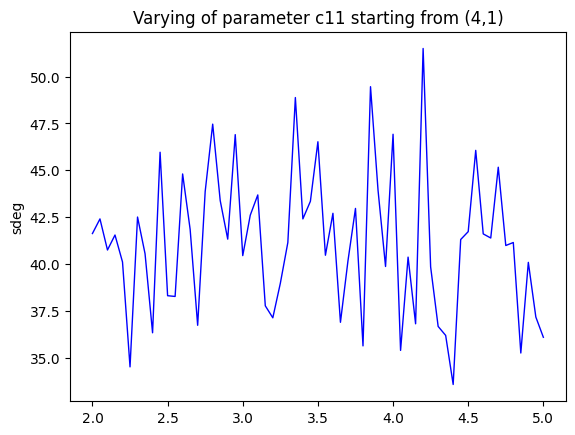

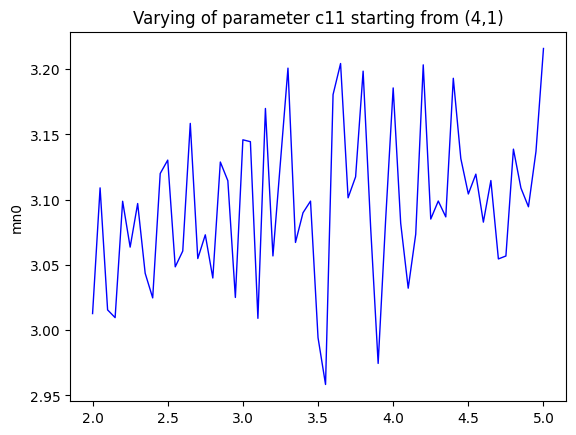

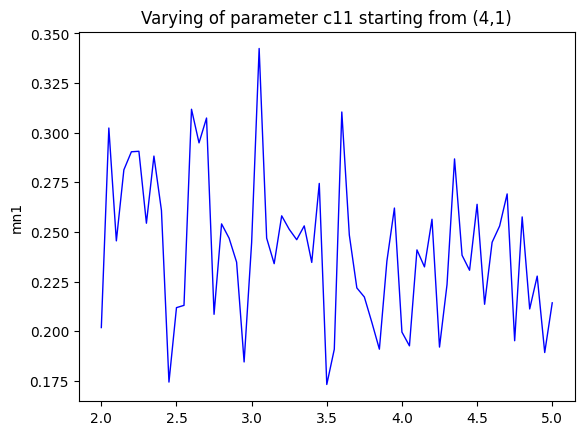

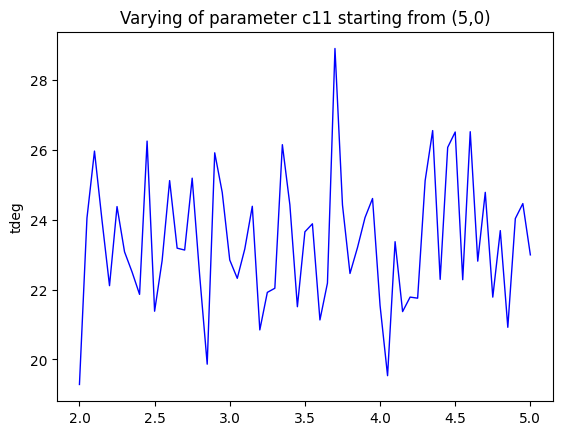

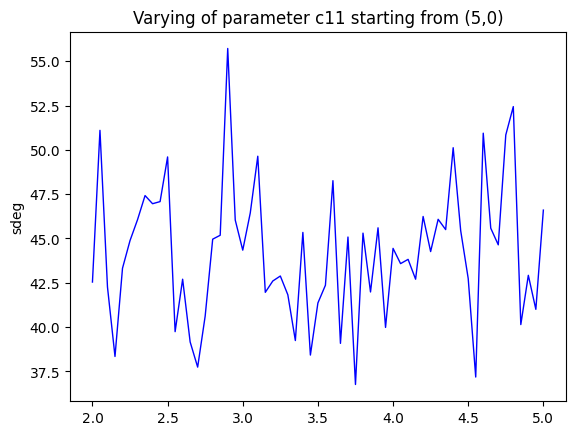

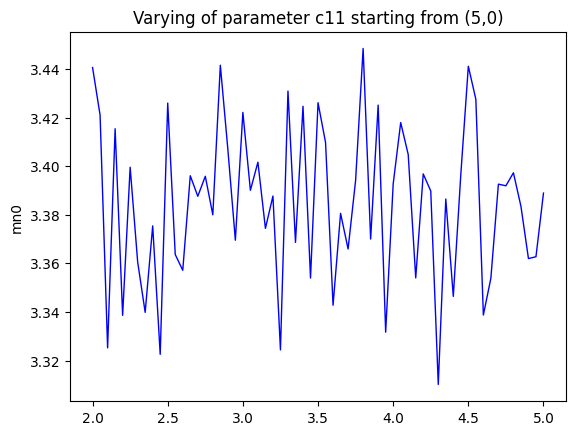

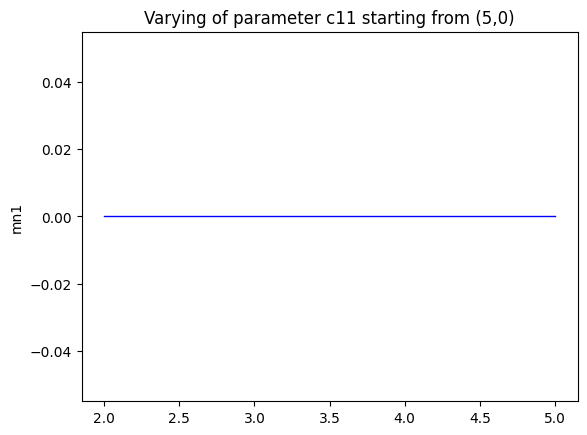

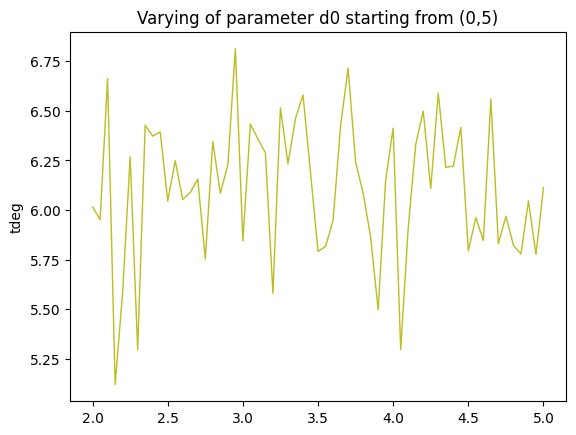

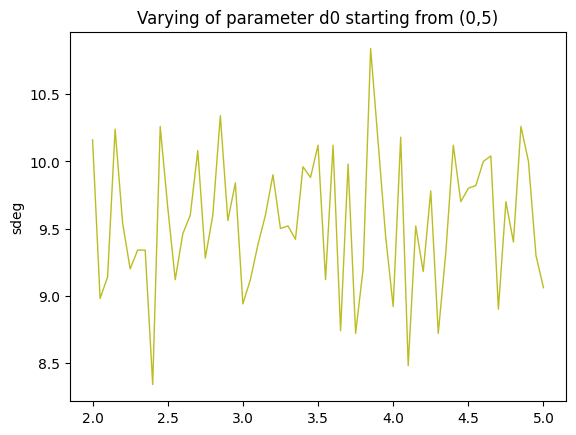

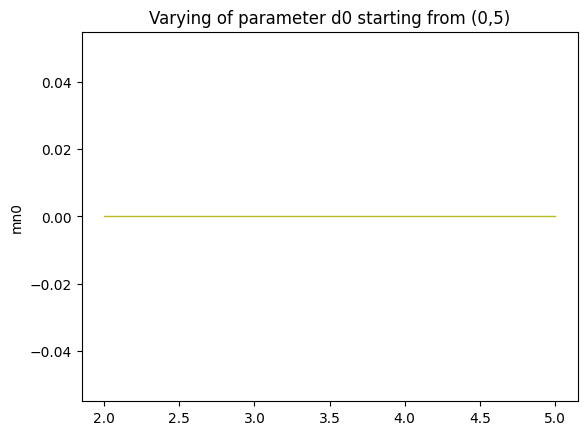

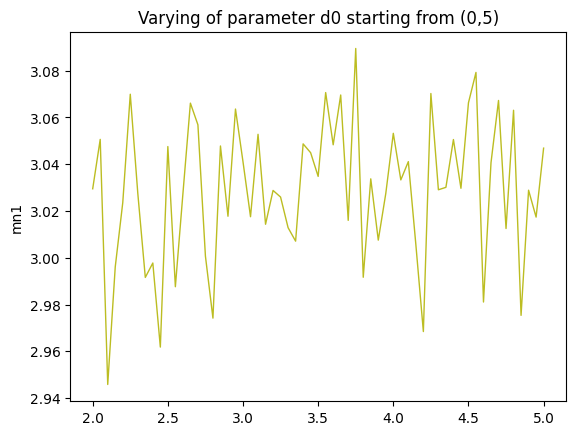

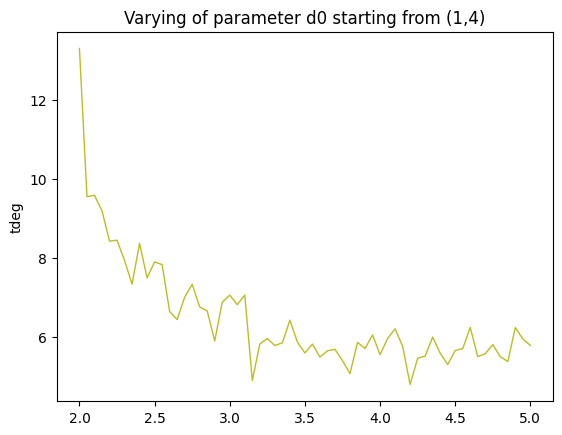

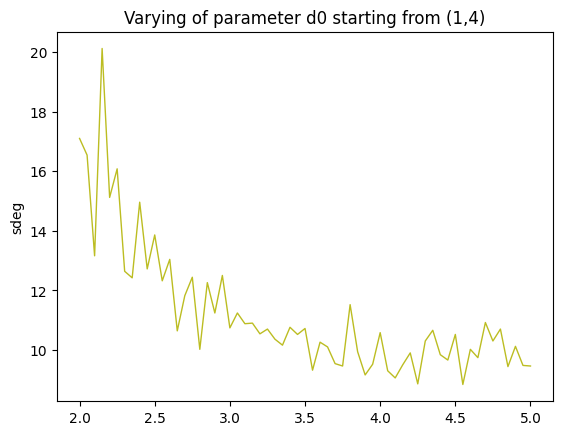

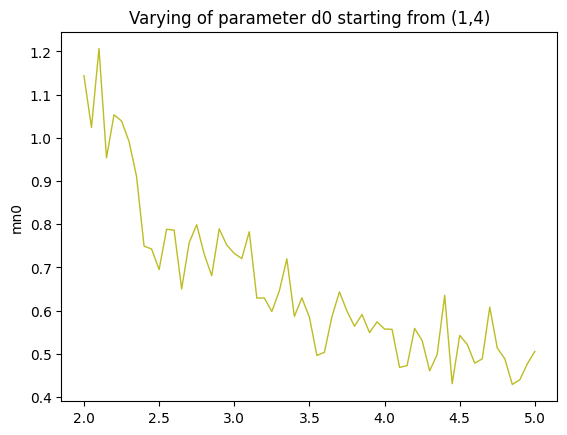

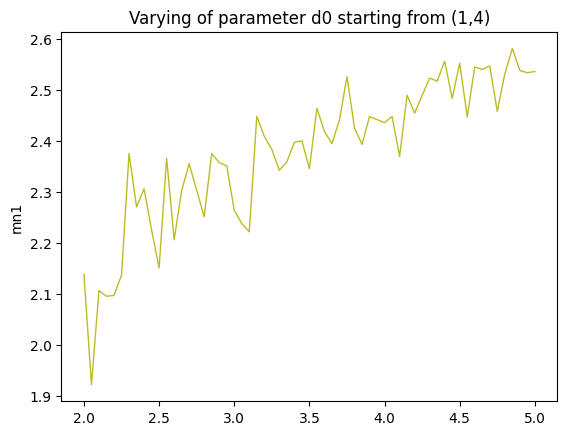

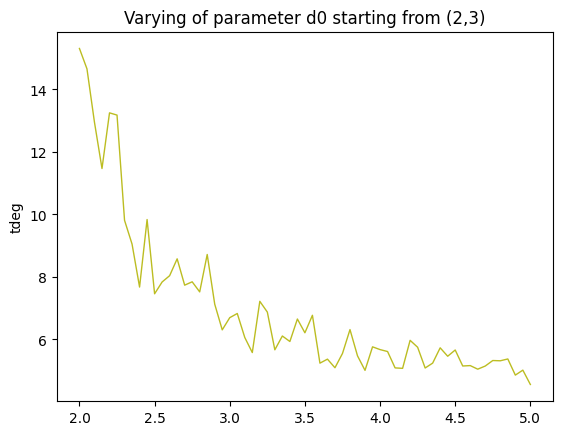

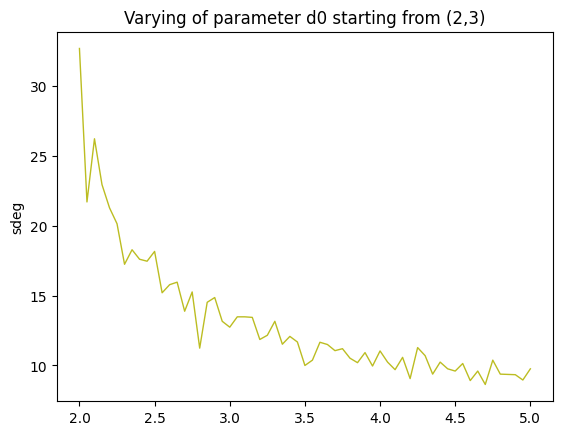

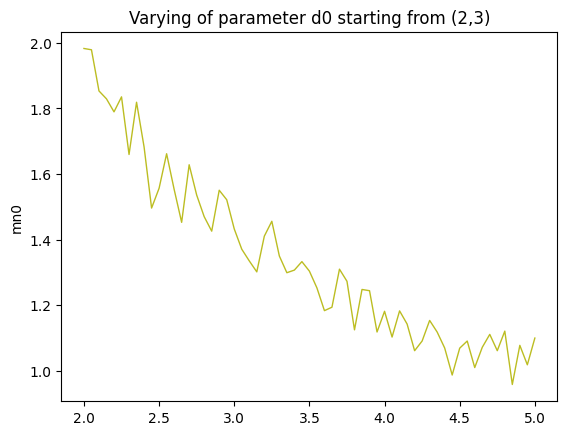

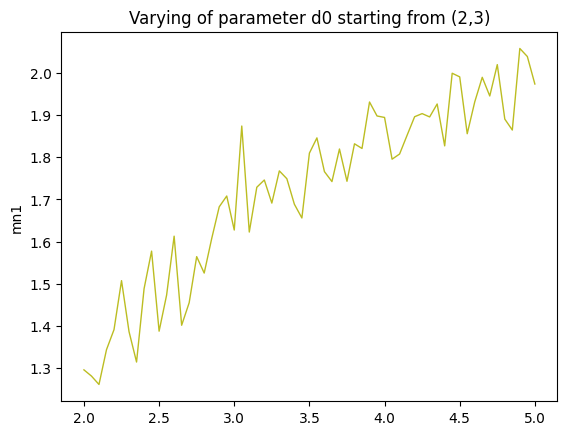

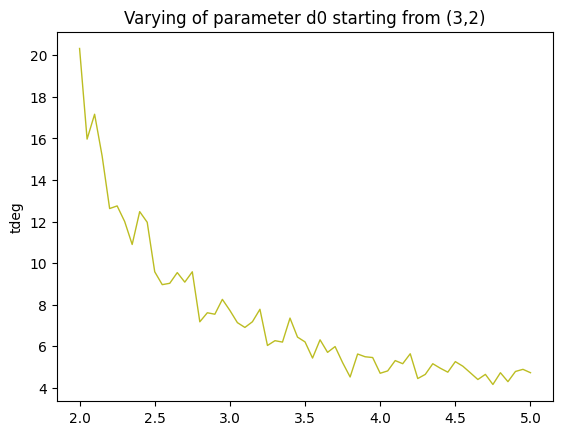

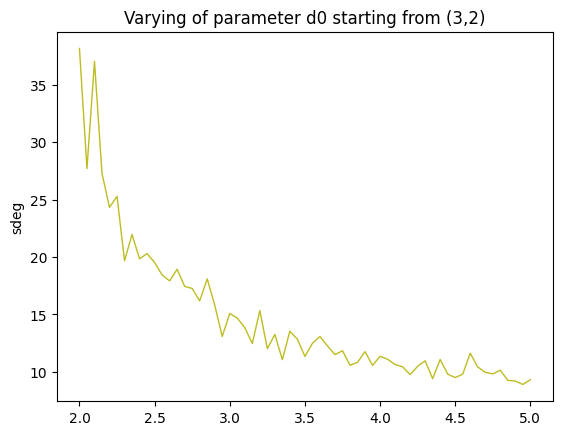

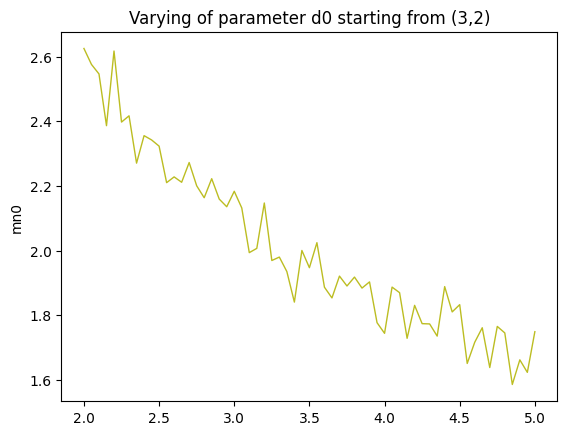

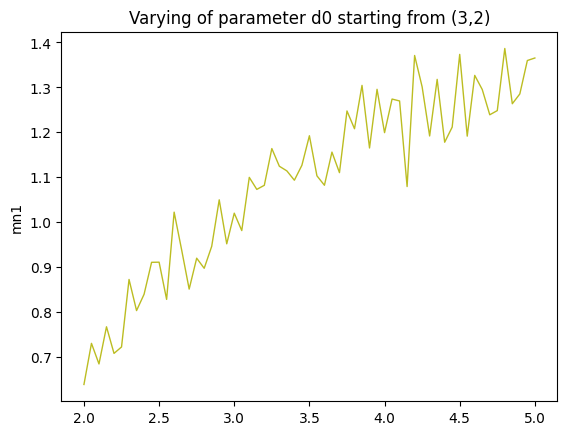

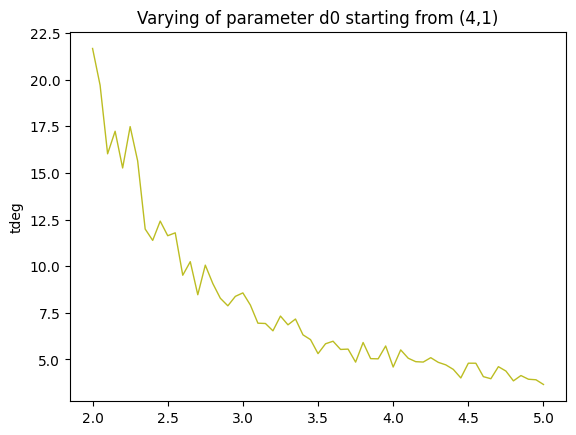

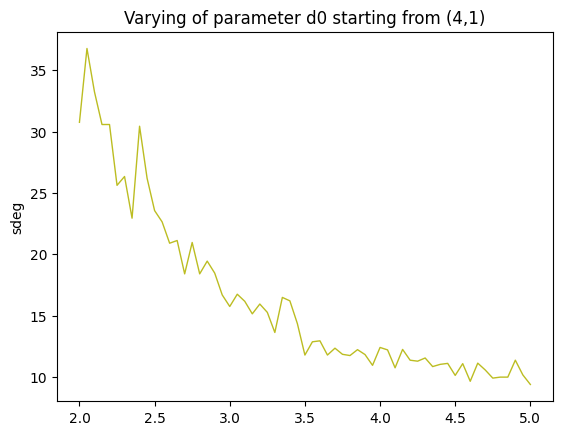

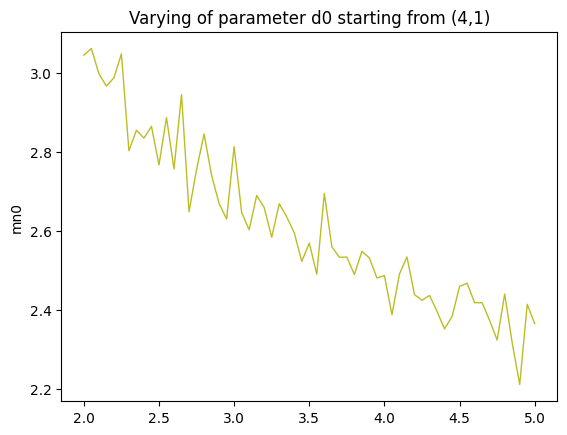

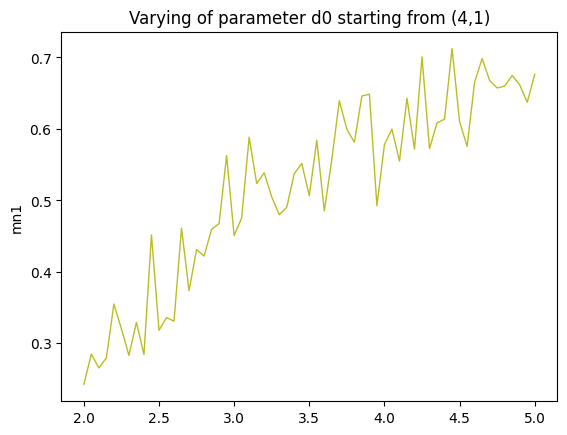

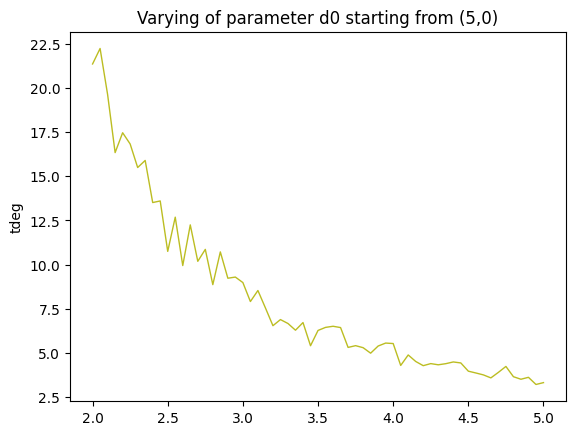

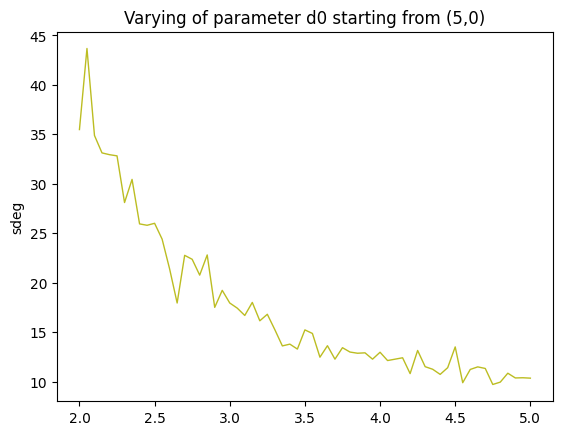

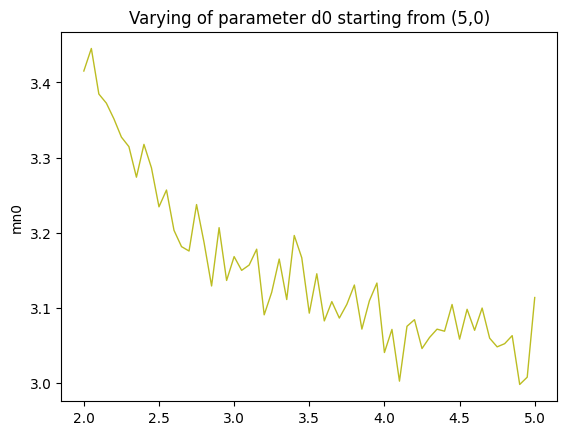

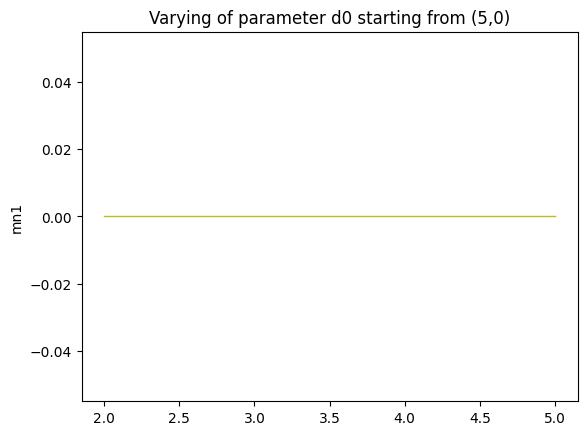

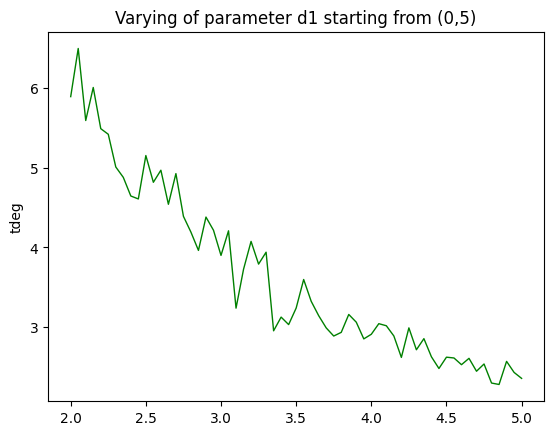

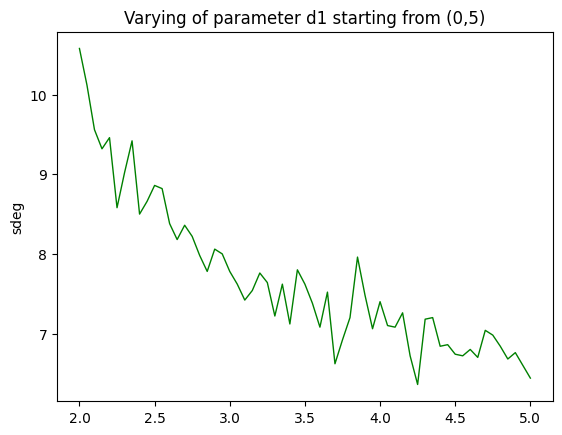

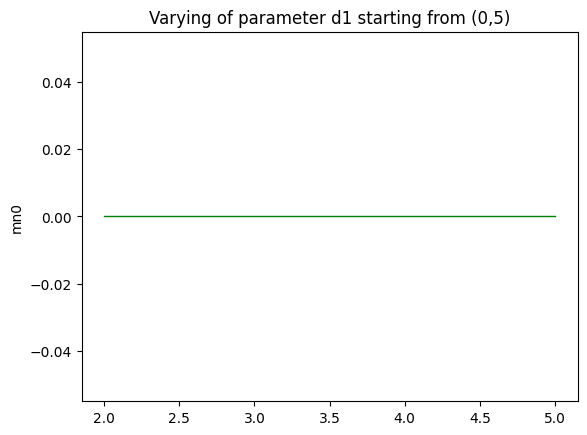

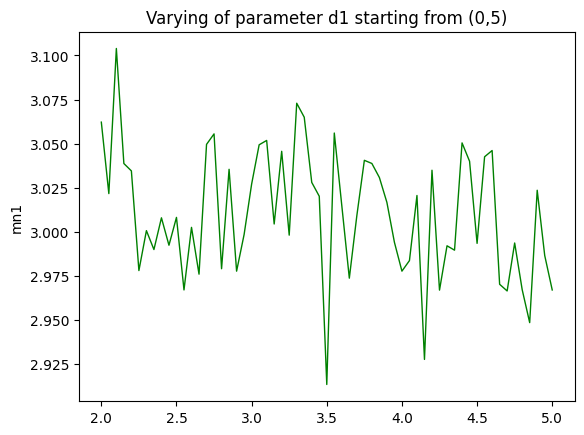

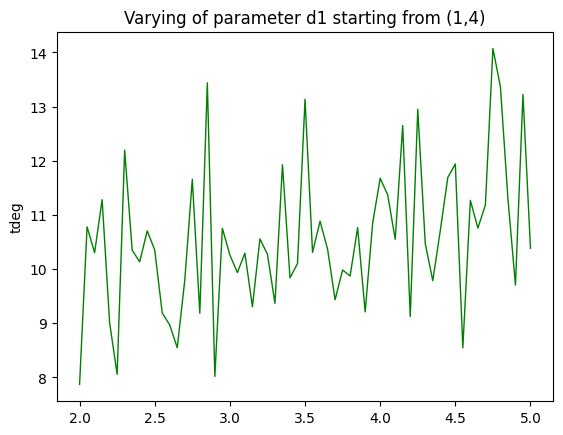

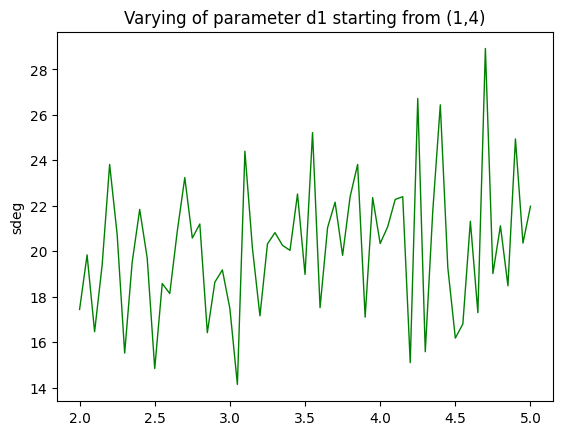

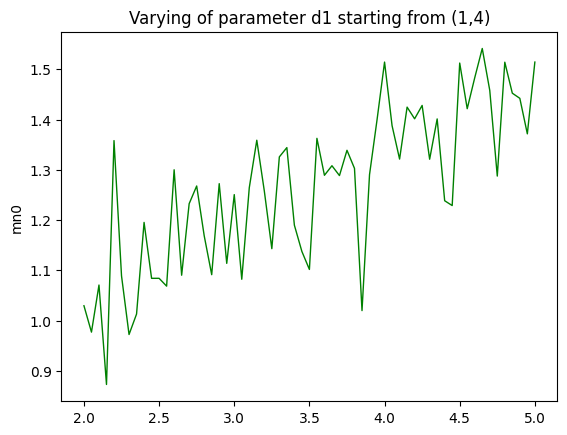

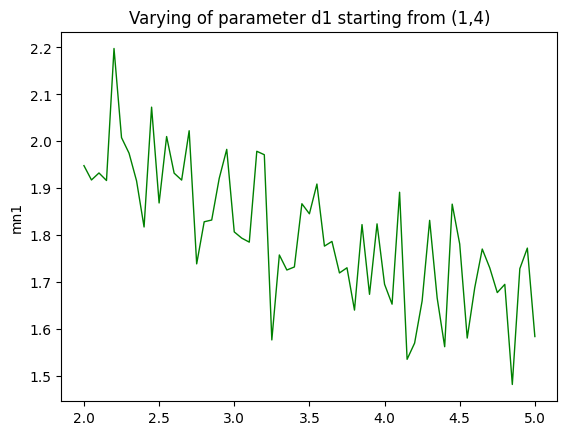

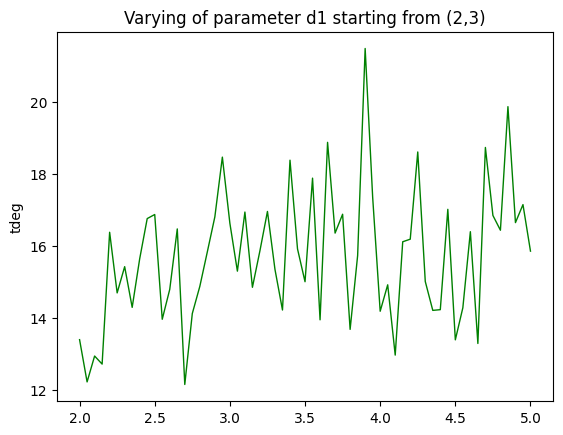

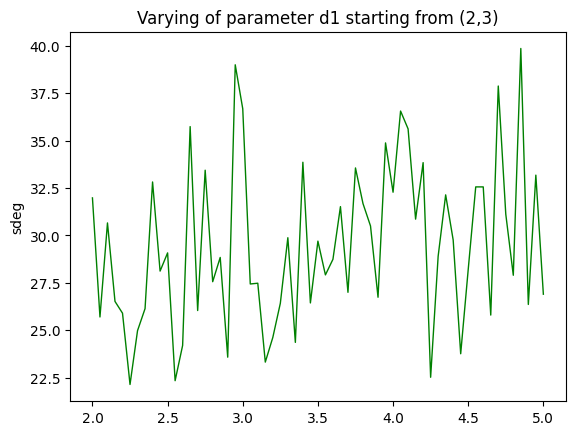

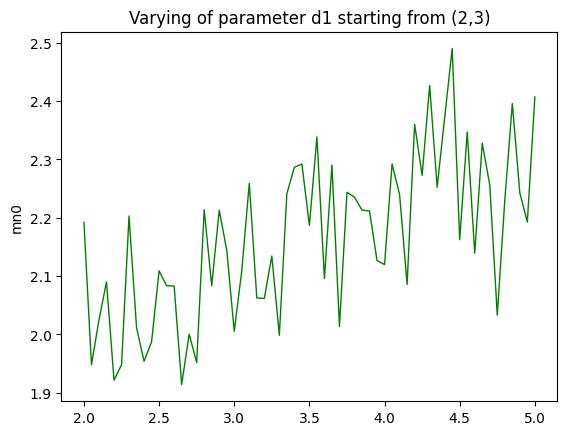

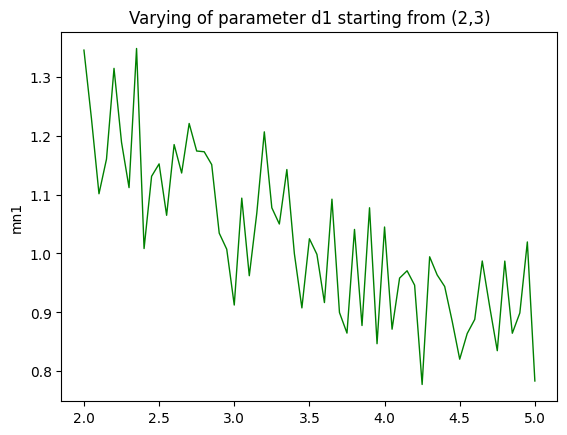

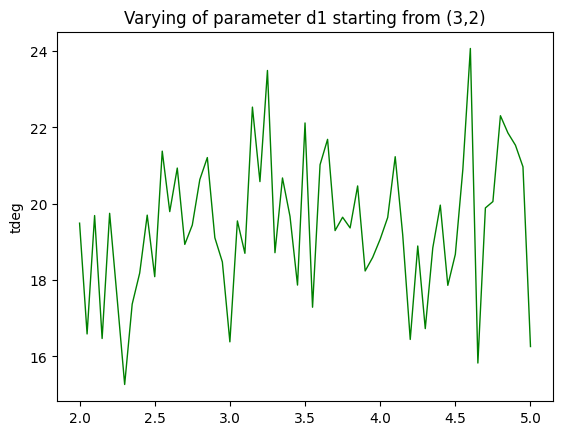

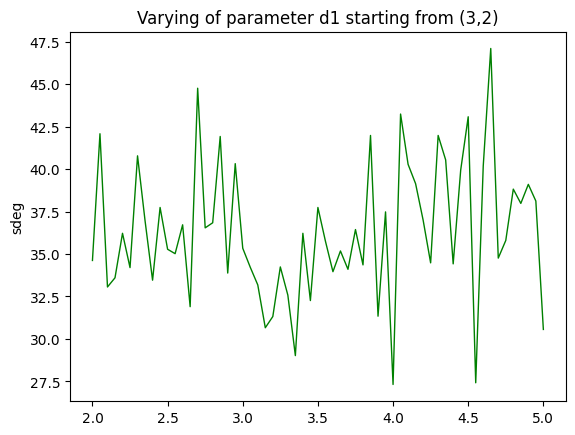

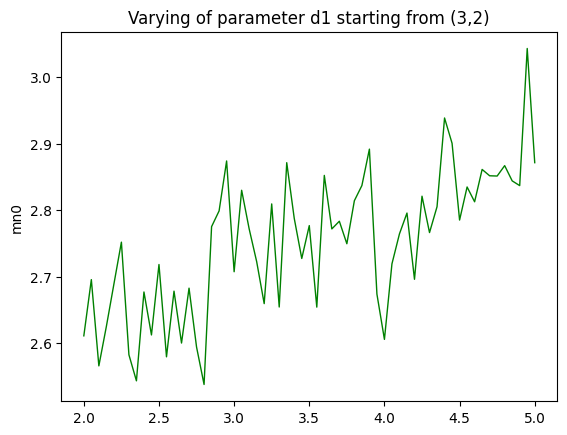

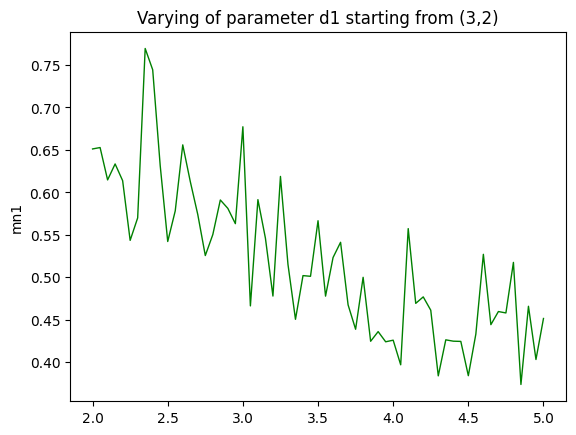

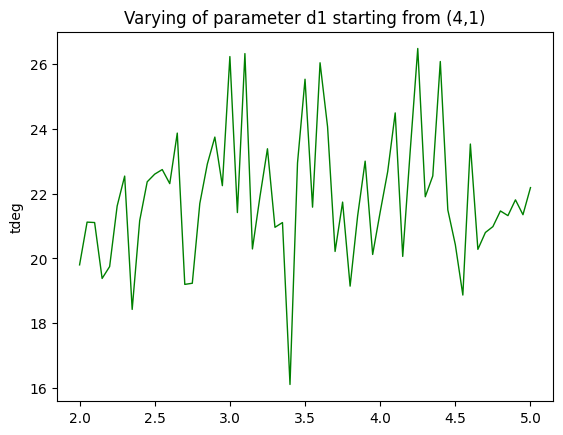

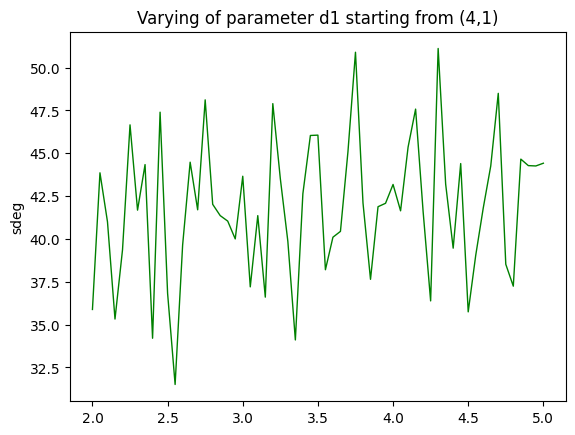

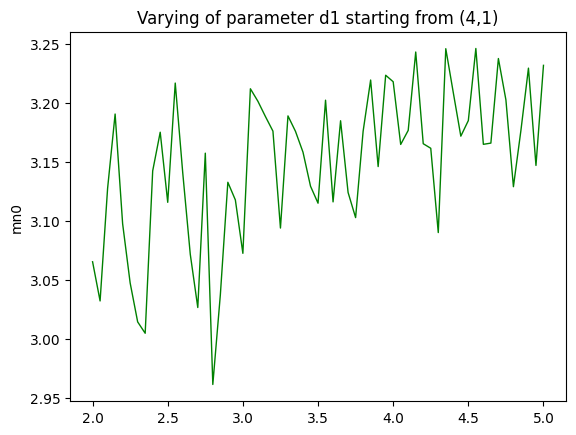

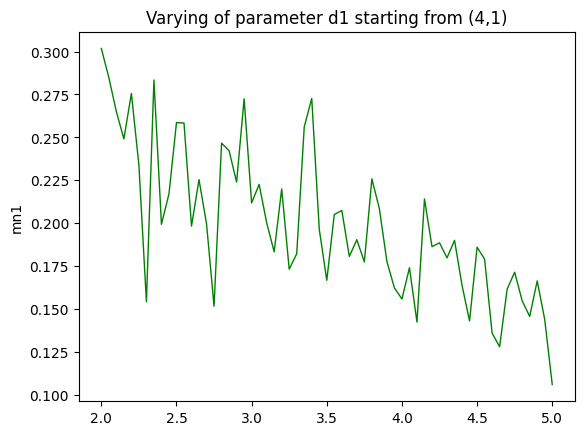

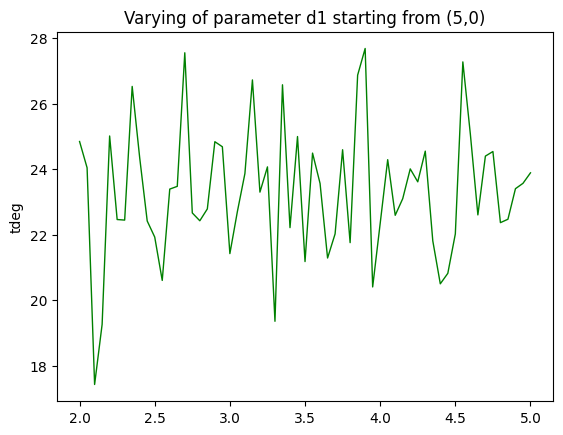

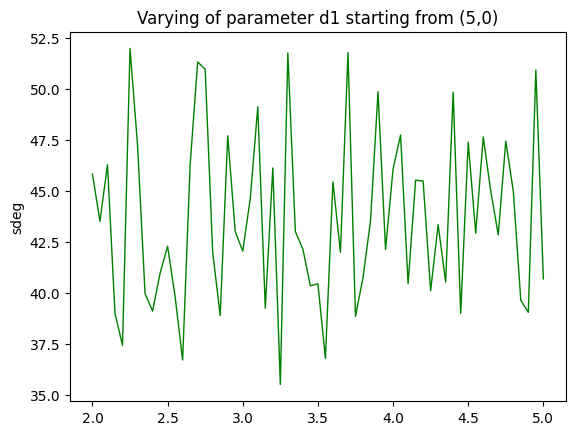

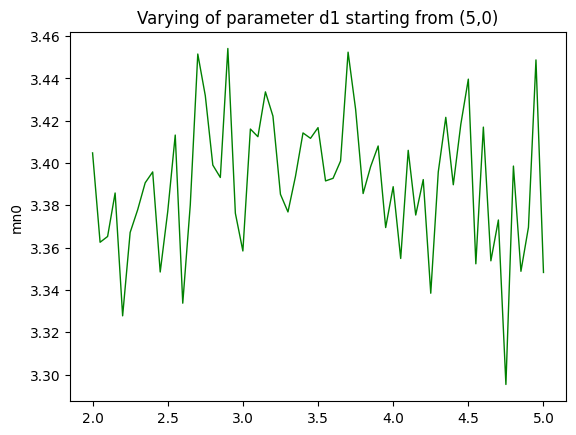

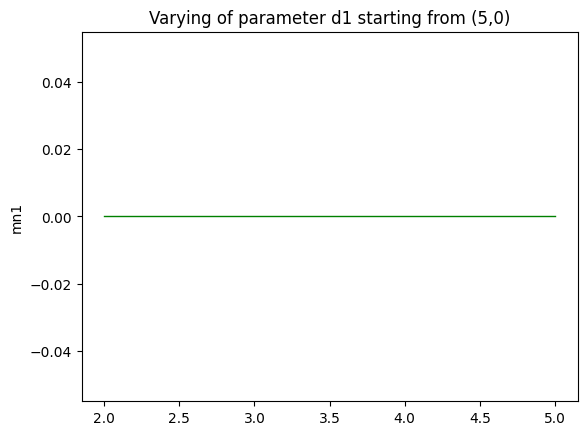

In [ ]:
colors = ['r', 'k', 'y', 'c', 'm', 'b', '#bcbd22', 'g']
param_codes = ['b0', 'b1', 'c00', 'c01', 'c10', 'c11', 'd0', 'd1']
fst_spcs = [0, 1, 2, 3, 4, 5]
char_types = ['tdeg', 'sdeg', 'mn0', 'mn1']

for p_c, c in zip(param_codes,colors):
  for f_s in fst_spcs:
    for c_t in char_types:
      plot_dependency(p_c, f_s, c_t, c)